# Module 1 Project Submission

Please fill out:
* Student name: Hsin Hin Lim
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


# Exploratory Data Analysis

My approach to the problem was as follows:

<ol>
 <li>Determine metrics for what "doing well at the box office means" - these are the metrics of Net Gross and Return on Investment(ROI)</li>
<li>Divide up films into different budget categories and by their popularity to test these metrics of profitability against these different categories</li>
<li>Whether films that did well by Net Gross were the same films that did well by ROI and if not, what characteristics did they have?</li>
    <li>Determine whether popular films were also commercially successful.</li>
<li>Find out what films were both popular and successful (from both an ROI and Net Gross measure)</li>
<li>Who the writers and directors were who worked on popular films that were commercially successful (from both an ROI and Net Gross measure)</li>
<li>Which genre of films are commercially successful and therefore worth making (from both an ROI and Net Gross perspective)</li>
<li>Given that the new studio can only make a set amount of films to begin with, what mix of films (by budget category) should they be looking to make</li>

In [3]:
# import packages
import pandas as pd
import glob
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from pywaffle import Waffle
sns.set_context('poster')
sns.set_style('darkgrid')
from bs4 import BeautifulSoup
import tmdbsimple as tmdb # this is a PyPi package that uses the TMDB api to retrieve movie info
from imdb import IMDb # this is a PyPi package that uses the IMDB api to retrieve movie info.
ia = IMDb()
import numpy as np
pd.set_option('display.max_rows', 500) 
pd.options.display.max_colwidth = 250
pd.set_option('colheader_justify', 'right')

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Downloading the CSV into pandas dataframe

In [4]:
# lets try to download multiple csv files so we can review them easily without having to repeat pd.read_csv multiple times
#this grabs only files in the current directory only if they end in csv or tsv
contents = [f for f in glob.glob('*') if f.endswith('csv') or f.endswith('tsv')] # using the glob method of the glob module
contents

['bom.movie_gross.csv',
 'imdb.name.basics.csv',
 'imdb.title.akas.csv',
 'imdb.title.basics.csv',
 'imdb.title.crew.csv',
 'imdb.title.principals.csv',
 'imdb.title.ratings.csv',
 'rt.movie_info.tsv',
 'rt.reviews.tsv',
 'tmdb.movies.csv',
 'tn.movie_budgets.csv']

In [5]:
# create two file_lists - one of csv files and another of tsv files

csv_files = [x for x in contents if x.endswith('csv')] # splits out a new list of csv filenames only from the original list
tsv_files = [x for x in contents if x.endswith('tsv')] # splits out a new list of tsv filenames only from the original list

print(csv_files, f'There are {len(csv_files)} csv files.')
print(tsv_files, f'There are {len(tsv_files)} csv files.')

['bom.movie_gross.csv', 'imdb.name.basics.csv', 'imdb.title.akas.csv', 'imdb.title.basics.csv', 'imdb.title.crew.csv', 'imdb.title.principals.csv', 'imdb.title.ratings.csv', 'tmdb.movies.csv', 'tn.movie_budgets.csv'] There are 9 csv files.
['rt.movie_info.tsv', 'rt.reviews.tsv'] There are 2 csv files.


In [6]:
# clean up the names of the csv and tsv files and add 'df' to them so they are names for the dataframes
# create 2 lists like this, one of csv names and one of tsv names
csv_names = ['df_' + file.strip('\'').rstrip('csv').replace('.','').rstrip() for file in csv_files]
tsv_names = ['df_' +file.strip('\'').rstrip('tsv').replace('.','').rstrip() for file in tsv_files]

print(csv_names, f'There are {len(csv_names)} csv names.')
print(tsv_names, f'There are {len(tsv_files)} tsv names.')

['df_bommovie_gross', 'df_imdbnamebasics', 'df_imdbtitleakas', 'df_imdbtitlebasics', 'df_imdbtitlecrew', 'df_imdbtitleprincipals', 'df_imdbtitleratings', 'df_tmdbmovies', 'df_tnmovie_budgets'] There are 9 csv names.
['df_rtmovie_info', 'df_rtreviews'] There are 2 tsv names.


In [7]:
# FOR CSV FILES
# this is the empty dictionary into which each dataframe is a value, with the key name being the relevant csv_name
csv_df = { }

# create dataframes from csv files by looping
for i in range(len(csv_files)):
    csv_df[csv_names[i]] = pd.read_csv(csv_files[i])
    
csv_df.keys()

dict_keys(['df_bommovie_gross', 'df_imdbnamebasics', 'df_imdbtitleakas', 'df_imdbtitlebasics', 'df_imdbtitlecrew', 'df_imdbtitleprincipals', 'df_imdbtitleratings', 'df_tmdbmovies', 'df_tnmovie_budgets'])

In [8]:
# first let's assign the dataframes by extracting them from the csv_df dictionary

imdb_name_basics = csv_df['df_imdbnamebasics'] # this refers to people
imdb_title_akas = csv_df['df_imdbtitleakas'] # this refers to movies, also df has a col 'title_Id' which is actually tconst
imdb_title_basics = csv_df['df_imdbtitlebasics'] #this refers to movies
imdb_title_crew = csv_df['df_imdbtitlecrew'] #this refers to people
imdb_title_principals = csv_df['df_imdbtitleprincipals']
imdb_title_ratings = csv_df['df_imdbtitleratings']

There are 11 datasets provided, these are: <br>
<ul>
    <li>9 datasets formatted as a dataset of comma separated values (the "<strong>CSV files</strong>")</li>
    <li>2 datasets formatted as a dataset of tab separated values (the "<strong>TSV files</strong>")</li>
    </ul>

Out of the 9 CSV Files, these are further broken down into:
<ol>
    <li>a file containing an IMDB database of names ("<strong>imdb_name_basics</strong>")</li>
    <li>a file containing an IMDB database of alternative film title names ("<strong>imdb_title_akas</strong>")</li>
    <li>a file containing an IMDB database of film information ("<strong>imdb_title_basics</strong>")</li>
    <li>a file containing an IMDB database of crew members ("<strong>imdb_title_crew</strong>")</li>  
    <li>a file containing an IMDB database of principal crew members ("<strong>imdb_title_principals</strong>")</li>
    <li>a file containing an IMDB database of ratings given to films ("<strong>imdb_title_ratings</strong>")</li>
    </ol>

Given that they are all files taken from IMDB, it is reasonable to expect that they might be combined to form a larger dataset that will answer the questions proposed. They have been read into panda dataframes with the name of each relevant dataframe set out in bold as per above.

We will review the remaining three CSV Files (bom.movie_gross csv, tmdb.movies.csv, tn_movie_budgets.csv) and the 2 TSV files (both from Rotten Tomatoes) later on.

For now, let's take brief look at the first few entries of each IMDB database.

### Reviewing the IMDB databases

#### Taking a look at imdb_name_basics

In [9]:
imdb_name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


This dataframe consists of details about persons who work in the film business, their primary name and their primariy profession.  It also includes unique ID numbers which refer to them personally ('<strong>nconst</strong>') or to films they had worked on (the tt numbers or <strong>'tconst'</strong>). The nconst and tconst may be keys which can be used to join up the IMDB databases.

#### Taking a look at imdb_title_akas

In [10]:
imdb_title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


This dataframe contains the alternative titles of films, depending on the region and release. From an initial reading, it is uncertain that the information contained therein will be immediately useful in terms of providing answers to our questions set up above.<br>

This dataframe does, however, confirm that the tconst number is widely used in these datasets as a key for individual films. The tconst numbers are set out in the column 'title_id' and it would appear that the various names given to Jurassic World, regardless of its language, all refer to the same film, with the same tconst.

#### Taking a look at imdb_title_basics

In [11]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


This dataframe confirms our initial suspicions about the tconst number. It also uses the tconst number to present even more detail about the films, like its genres etc and runtime.

In [12]:
# write a function to retreive a name where nconst is the argument

def person_data(nconst): #argument must be in quote marks when using this function
    name = imdb_name_basics[imdb_name_basics['nconst'] == nconst]
    return name

# write a function to take a name and return the nconst

def nconst_is(fullname): #as a string, with spaces if necessary:
    name = imdb_name_basics[imdb_name_basics['primary_name'] == fullname]
    return name

# write a function to return a name only of a person.
def name_only(nconst):
    name = person_data(nconst)
    name.reset_index(drop = True, inplace =True)
    result = name.at[0,'primary_name']
    return result

In [13]:
name_only('nm1940585')

'Bill Haley'

#### Taking a look at imdb_title_crew

In [14]:
imdb_title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


Using the same tconst number as above, one can discover the writers and directors of a particular film. But their names are not in here, they are referred to by their nconst number. This confirms that nconst numbers are IDs pursuant to which certain individuals can be identified. This database is a candidate for being joined up using the tconst number as the key.

#### Taking a look at imdb_title_principals

In [15]:
imdb_title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


Arranged again by tconst - this dataframe lets us know who (as described by the nconst) worked on which (as described by the tconst) film and in what capacity.  By contrast with the previous dataframes, this isn't such a good candidate to join up using the tconst as a key because the tconst numbers in this dataframe aren't unique.  A cursory glance at the top 3 entries will show that the tconst 'tt0111414' repeats three times.

#### Taking a look at imdb_title_ratings

In [16]:
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


This dataframe shows the popularity of each film, as organised by their tconst. This database is also a candidate for being joined up by their tconst. 

Finally, work out what is the length of each of the databases. 

In [17]:
# simple loop of the csv names ought to do it.
for d in csv_names:
    print(f'The length of {d} is {len(csv_df[d])}.')

The length of df_bommovie_gross is 3387.
The length of df_imdbnamebasics is 606648.
The length of df_imdbtitleakas is 331703.
The length of df_imdbtitlebasics is 146144.
The length of df_imdbtitlecrew is 146144.
The length of df_imdbtitleprincipals is 1028186.
The length of df_imdbtitleratings is 73856.
The length of df_tmdbmovies is 26517.
The length of df_tnmovie_budgets is 5782.


It appears that imdb_title_basics and imdb_title_crew have the same number of entries. That makes them prime candidates for them to merge.

The number of ratings is substantially lower, that means not every film in the database is rated. If and when this is merged with other dataframes on tconst, NaNs are expected.

### Merging the IMDB databases

The above suggests that to have a larger database to work with while retaining granularity, we should:<br>

<ol>
    <li> join imdb_title_basics with imdb_title_crew (we will call this df_basics_crew); and </li>
    <li> we will then join df_basics_crew thereby created and join that with imdb_title_ratings into a larger dataframe that we could work with ("<strong>df_imdb</strong>"). </li>
    </ol>    
For the time being, we will leave imdb_name_basics, imdb_title_principals and imdb_akas alone, either because they don't use tconst as a unique key on which to join or because the information therein isn't relevant at this point.

#### Joining imdb_title_basics and imdb_title_crew

In [18]:
# first, merging title_basics and title_crew
df_basics_crew = pd.merge(imdb_title_basics,imdb_title_crew, on = ['tconst'], how='inner')
df_basics_crew

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,"nm0000080,nm0462648"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531,nm0347899
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","nm0765384,nm0749914","nm1360635,nm0749914"
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,nm8185151,"nm4843252,nm4900525,nm2679404"
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,"nm9272490,nm9272491","nm9272490,nm9272491"
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,nm7764440,nm7933903
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,nm10538612,nm10538612


It would appear that joining the two dataframes on an inner join preserved the same number of datapoints (146144 rows) as before. This is ideal in terms of preserving the size of the data set we have to work with.

#### Joining the dataframe created above with imdb_title_ratings

It would be useful to merge the ratings of films (where ratings exist) to get a sense of how popular some of the films are in the IMDB dataset.  Some measure of popularity is required in order for us to answer the initial questions we have set.

In [19]:
# merge imdb_titleratings with df_basics_crew
df_imdb = pd.merge(df_basics_crew,imdb_title_ratings, on = ['tconst'], how='left')

df_imdb

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,NaN,7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,"nm0000080,nm0462648",6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531,nm0347899,6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","nm0765384,nm0749914","nm1360635,nm0749914",6.5,119.0
...,...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,nm8185151,"nm4843252,nm4900525,nm2679404",NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,"nm9272490,nm9272491","nm9272490,nm9272491",NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,nm7764440,nm7933903,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,nm10538612,nm10538612,NaN,NaN


A left join like this will again, preserve the size of the dataset we have to work with by keeping it at 146144 rows of data. It will however, mean that certain films do not have ratings associated with them, judging by the NaN in some in the 'averagerating' and 'numvotes' columns.

In [20]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 10 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
directors          140417 non-null object
writers            110261 non-null object
averagerating      73856 non-null float64
numvotes           73856 non-null float64
dtypes: float64(3), int64(1), object(6)
memory usage: 12.3+ MB


Up to this point, we have analysed and handled the data in relation to the IMDB databases, creating a new dataframe (df_imdb) that we can work with and parking the other IMDB dataframes for the moment, perhaps for later use.<br>

We should now consider the other databases provided.

### Explore the remaining CSV files

Having gone as far as we could with the IMDB databases, now its time to take a look at how to use df_bommovie_gross, df_tmdbmovies, df_tnmovie_budgets, the remaining CSV files in the data sets provided.

In [21]:
# Assign a variable to each of the remaining csv files that are not imdb csv files
df_tnmovie_budgets = csv_df['df_tnmovie_budgets']
df_tmdbmovies = csv_df['df_tmdbmovies']
df_bommovie_gross = csv_df['df_bommovie_gross']

#### Taking a look at df_tmdbmovies

Judging by the values of the columns. It looks like df_tmdbmovies contains an extra column 'Unnamed: 0' - it merely replicates the dataframe index. Let's clean it up by dropping it entirely.

In [22]:
df_tmdbmovies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [23]:
# drop extra column
df_tmdbmovies.drop(columns = ['Unnamed: 0'], inplace=True)

As per the example below, the TMDB database can already be used on a standalone basis to filter out movies that are popular, though it contains no explicit data on the financial performance of a film - perhaps that could be merged in using another dataframe with such financial data.

In [24]:
# for instance, using the tmdbmovies dataframe, sort by descending vote average only those movies with more than 10,000 votes
df_tmdbmovies[df_tmdbmovies['vote_count'] > 10000].sort_values(by ='vote_average', ascending = False)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11032,"[12, 18, 878]",157336,en,Interstellar,28.440,2014-11-05,Interstellar,8.2,18597
2472,"[10751, 16, 18]",8587,en,The Lion King,28.583,1994-06-23,The Lion King,8.2,10160
2471,"[10751, 14, 12]",12445,en,Harry Potter and the Deathly Hallows: Part 2,29.206,2011-07-15,Harry Potter and the Deathly Hallows: Part 2,8.1,11567
11026,"[36, 18, 53, 10752]",205596,en,The Imitation Game,33.078,2014-12-19,The Imitation Game,8.1,10396
19,"[18, 53, 9648]",11324,en,Shutter Island,18.060,2010-02-18,Shutter Island,8.1,12625
14184,"[18, 35, 16, 10751]",150540,en,Inside Out,24.797,2015-06-19,Inside Out,8.0,12691
5189,"[18, 37]",68718,en,Django Unchained,21.260,2012-12-25,Django Unchained,8.0,15725
7883,"[80, 18, 35]",106646,en,The Wolf of Wall Street,29.518,2013-12-25,The Wolf of Wall Street,7.9,12411


In [25]:
#Is there duplicate data that might need cleaning up?
print(len(df_tmdbmovies), df_tmdbmovies['id'].nunique())

26517 25497


Judging from the above, the length of the entire dataframe is longer than the number of unique IDs in the dataframe. This suggests that there are 2,000 plus duplicate entries that need cleaning up before this dataframe can be used.  This is an opportunity to write a function (which may prove useful later) to test this theory.

In [26]:
# write a function to retrieve a movie based on its name in df_tmdmovies
def get_title(title): #argument must be a string
    movie = df_tmdbmovies[df_tmdbmovies['title'] == title]
    return movie

In [27]:
get_title('Toy Story') # there are duplicate entries

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174


For example, there are multiple entries with the same IDs for Toy Story, judging by the above these are clearly duplicate entries.  It might have been theoretically possible for 2 different movies to be both called Toy Story, but in that case, one would expect them to have different IDs. These are therefore clearly multiple entries.

In [28]:
# remove duplicate entries from the database, keeping the first entry encountered and discarding duplicates thereafter
df_tmdbmovies.drop_duplicates(inplace = True, keep='first')

The number of unique IDs match the number of unique entries in the dataframe, which is what we would expect.

In [29]:
# just to check if any title entries are NaN (none are), 
# in addition, we would like to check what the length of the dataframe and the number of unique titles are now.
print(df_tmdbmovies['id'].isnull().any(), len(df_tmdbmovies), df_tmdbmovies['id'].nunique())

False 25497 25497


In [30]:
# let's also try looking for Toy Story again using the function we wrote earlier.
get_title('Toy Story') # it looks like the duplicate has been removed.

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174


In [31]:
df_tmdbmovies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


#### Taking a look at df_tnmovie_budgets and df_bommovie_gross

Let's take a look at both these dataframes at the same time, because they both seem to contain the financial metrics we require to answer, from a financial perspective, the questions we had set out initially.

In [32]:
df_tnmovie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [33]:
df_bommovie_gross.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


It looks like df_tnmovie_budgets is the longer dataframe, with more datapoints tha df_bommovie_gross. In addition, there is a column referring to production budget that df_bommovie_gross doesn't have. df_bonmovie_gross has a column for the studio that has produced a particular film, but the question as to who makes the most financially successful film isn't the same questions we had posited initially - which was which type of films are successful. This data therefore, isn't necessary to answer our questions.<br>

Therefore, I would keep df_tnmovie_budgets for now and work with that but park df_bommovie_gross unless it becomes useful later.

It would be ideal if we could merge the financial information in df_tnmovie_budgets into df_imdb. There is no tconst number in this case to use as the key for a merge, but the titles look like a promising key to work with. For that approach to work, the primary and foreign key in the two dataframes ought to have the same name.

In [34]:
# rename label for 'movie' column to 'primary_title' so both df_tnmovie_budget and df_imdb both have a common key
df_tnmovie_budgets.rename(columns = {'movie':'primary_title'}, inplace=True)

In [35]:
df_tnmovie_budgets

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


## Merging dataframes into one for analysis

### Merge and clean up of data

We can now merge df_tnmovie_budgts and df_imdb, using 'primary_title' as the key. The intention is to keep in the database only such films that contain financial information (production_budget/domestic_gross/worlwide_gross) in df_tnmovie_budgets.  We will also use the opportunity to transform the financial information, which exists as string expressions of a dollar value, into integers which can be calculated. We will name this dataframe the '<strong>overall_df</strong>'.

In [36]:
# merging the dataframes
overall_df = pd.merge(df_imdb,df_tnmovie_budgets, on = 'primary_title', how = 'inner')

# we need to change production_budget into a integer or float we can analyse.
overall_df['production_budget'] = overall_df['production_budget'].map(lambda x: x.strip('$').replace(',',''))
overall_df['production_budget'] = pd.to_numeric(overall_df['production_budget'])

# we need to do the same for domestic_gross and worldwide_gross columns by converting to an integer that we can calculate
overall_df['domestic_gross'] = overall_df['domestic_gross'].map(lambda x: x.strip('$').replace(',',''))
overall_df['domestic_gross'] = pd.to_numeric(overall_df['domestic_gross'])

overall_df['worldwide_gross'] = overall_df['worldwide_gross'].map(lambda x: x.strip('$').replace(',',''))
overall_df['worldwide_gross'] = pd.to_numeric(overall_df['worldwide_gross'])

# let's change release_date into a datetime object that can be analysed
overall_df['release_date'] = pd.to_datetime(overall_df['release_date'])

overall_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",nm0440415,"nm0440415,nm0923312,nm0295165,nm0841854,nm0220297",1.9,8248.0,26,2012-12-31,45000000,0,73706
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",nm2585406,nm3859643,NaN,NaN,10,1995-08-18,20000000,70433227,122133227
2,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,nm1208371,"nm1170333,nm1208371",7.5,24.0,21,2015-06-19,200000,1109808,1165996
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",nm2674307,nm2674307,6.1,14828.0,21,2015-06-19,200000,1109808,1165996
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",nm0758574,"nm0449616,nm1433580",6.1,37886.0,17,2013-03-22,25000000,720828,9313302


In [37]:
overall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 15 columns):
tconst               3815 non-null object
primary_title        3815 non-null object
original_title       3814 non-null object
start_year           3815 non-null int64
runtime_minutes      3328 non-null float64
genres               3743 non-null object
directors            3727 non-null object
writers              3351 non-null object
averagerating        2875 non-null float64
numvotes             2875 non-null float64
id                   3815 non-null int64
release_date         3815 non-null datetime64[ns]
production_budget    3815 non-null int64
domestic_gross       3815 non-null int64
worldwide_gross      3815 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(5), object(6)
memory usage: 476.9+ KB


The resulting dataframe is one with datapoints from df_imdb for which there is production budget and gross receipts data from df_tnmovie_budgets.  

This is still a dataset of about 3800 plus movies for which every movie will have a value representing financial data (even it is zero) -there are no movies with NaN entries for financial metrics, see below.

There are however, NaN values in the 'averagerating' column - we should be able to tolerate this because the foremost priority is to build a table containing financial metrics for answering our initial questions.

In [38]:
print(overall_df[['domestic_gross', 'production_budget', 'worldwide_gross', 'averagerating']].isnull().any())

domestic_gross       False
production_budget    False
worldwide_gross      False
averagerating         True
dtype: bool


### How many times to count a film? Handling duplicate entries

As a next step, we should remove any duplicates, if any, from the overall_df. For the purposes of this exercise, the re-release of an old movie much later into the future shall be determined as a separate movie and not a duplicate. Each entry in overall_df should be a unique film, even if such film happened to share the same name with other films. The best indicators of a duplicate on this basis would be to look for duplications in 'id' and 'release_date'.

Firstly, are there any duplicate titles? It would be worth looking at that closely.

In [39]:
overall_df.duplicated(['primary_title']).any() #this suggests that certain title names have been repeated

True

In [40]:
duplicate_rows = overall_df[overall_df.duplicated(['release_date','id'])].sort_values(by = ['id','release_date'])
duplicate_rows # it looks like there are a considerable number of duplicates.

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
1482,tt2404695,Nighthawks,Nighthawks,2011,NaN,Drama,nm5069456,nm5069456,NaN,NaN,1,1981-04-10,5000000,14600000,19600000
1483,tt6801218,Nighthawks,Nighthawks,2019,NaN,"Drama,Thriller",nm7629684,nm7629684,8.6,19.0,1,1981-04-10,5000000,14600000,19600000
2383,tt6077456,Beautiful,Beautiful,2016,NaN,NaN,nm4433088,NaN,NaN,NaN,1,2000-09-29,9000000,3134509,3134509
2384,tt7594192,Beautiful,Beautiful,2019,NaN,Drama,nm9267400,nm9267400,NaN,NaN,1,2000-09-29,9000000,3134509,3134509
3069,tt9379256,Timeline,Timeline,2013,82.0,Romance,nm10301935,NaN,NaN,NaN,1,2003-11-26,80000000,19480739,26703184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,tt6266538,Vice,Vice,2018,132.0,"Biography,Comedy,Drama",nm0570912,nm0570912,7.2,72855.0,100,2018-12-25,60000000,47836282,70883171
2546,tt4598720,Glass,Glass,2016,71.0,"Drama,Mystery,Thriller",nm7257237,nm7257237,8.2,84.0,100,2019-01-18,20000000,111035005,245303505
2547,tt5144236,Glass,Glass,2015,77.0,"Crime,Horror,Mystery",nm1410503,nm1410503,3.4,29.0,100,2019-01-18,20000000,111035005,245303505
2548,tt5300236,Glass,Glass,2017,105.0,"Drama,Sci-Fi",nm4275053,nm4275053,NaN,NaN,100,2019-01-18,20000000,111035005,245303505


In [41]:
# taking 'The Island' from the duplicate_rows above, it appears that multiple entries are the same.
overall_df[overall_df['primary_title'] == 'The Island']  

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
1671,tt1737256,The Island,The Island,2011,95.0,"Drama,Romance",nm1189816,nm1189816,5.1,705.0,100,2005-07-22,120000000,35818913,163018913
1672,tt1737256,The Island,The Island,2011,95.0,"Drama,Romance",nm1189816,nm1189816,5.1,705.0,35,1980-06-13,22000000,15716828,15716828
1673,tt2611006,The Island,The Island,2012,49.0,"Documentary,News",nm4523812,nm4523812,NaN,NaN,100,2005-07-22,120000000,35818913,163018913
1674,tt2611006,The Island,The Island,2012,49.0,"Documentary,News",nm4523812,nm4523812,NaN,NaN,35,1980-06-13,22000000,15716828,15716828
1675,tt6335394,The Island,The Island,2017,60.0,"Documentary,Drama",nm8526367,NaN,NaN,NaN,100,2005-07-22,120000000,35818913,163018913
1676,tt6335394,The Island,The Island,2017,60.0,"Documentary,Drama",nm8526367,NaN,NaN,NaN,35,1980-06-13,22000000,15716828,15716828
1677,tt6449204,The Island,Jue ming dao,2010,90.0,Comedy,nm7057619,"nm7057619,nm9264935",NaN,NaN,100,2005-07-22,120000000,35818913,163018913
1678,tt6449204,The Island,Jue ming dao,2010,90.0,Comedy,nm7057619,"nm7057619,nm9264935",NaN,NaN,35,1980-06-13,22000000,15716828,15716828
1679,tt8755316,The Island,Yi chu hao xi,2018,134.0,"Comedy,Drama",nm2348646,"nm3968338,nm2898643,nm2348646,nm10047038,nm3488222,nm5637362,nm3369882",6.2,1001.0,100,2005-07-22,120000000,35818913,163018913
1680,tt8755316,The Island,Yi chu hao xi,2018,134.0,"Comedy,Drama",nm2348646,"nm3968338,nm2898643,nm2348646,nm10047038,nm3488222,nm5637362,nm3369882",6.2,1001.0,35,1980-06-13,22000000,15716828,15716828


From the output above, it should be a reasonable approach to delete duplicate entries with the same 'id' and release date. This should leave overall_df with a dataframe of unique movies, even if some of those movies have the same primary_title. It is also clear from the above that the IMDB tconst is different for each <strong>different language</strong> version of the <strong>same</strong> film.

In [42]:
#remove duplicates with same id and release date from overall_df
overall_df = overall_df.drop_duplicates(subset =['release_date','id'])

In [43]:
overall_df.duplicated(['primary_title']).any() # this shows that films with the same name are still in overall_df

True

It looks like there are still duplicate primary_titles, but that may not be so unacceptable because we might want to keep an updated remake of an old film (with a different release date) in overall_df for us to analyse as an independent film in its own right. Let's see what primary_titles are duplicated.

In [44]:
duplicate_rows_2 = overall_df[overall_df.duplicated(['primary_title'])]
duplicate_rows_2  #these are now all the films with the same primary_title in overall_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
102,tt0800320,Clash of the Titans,Clash of the Titans,2010,106.0,"Action,Adventure,Fantasy",nm0504642,"nm2012438,nm0006534,nm0542062,nm0189117",5.8,256176.0,51,1981-06-12,15000000,30000000,44400000
125,tt0816462,Conan the Barbarian,Conan the Barbarian,2011,113.0,"Action,Adventure,Fantasy",nm1197971,"nm0232776,nm0649191,nm0393517,nm0397574",5.2,90834.0,44,1982-05-14,20000000,38264085,79114085
134,tt0831387,Godzilla,Godzilla,2014,123.0,"Action,Adventure,Sci-Fi",nm2284484,"nm1440919,nm1709264,nm0393094,nm0613609,nm0443227,nm0001104,nm0333060",6.4,350687.0,74,1998-05-19,125000000,136314294,376000000
137,tt0837563,Pet Sematary,Pet Sematary,2019,101.0,"Horror,Mystery,Thriller","nm1556116,nm1552637","nm0000175,nm0338557,nm1161528",6.0,34472.0,61,1989-04-21,11500000,57469179,57469179
142,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",nm0923736,"nm0923736,nm0672015",8.1,1183655.0,35,1998-08-14,60000000,23385416,48585416
154,tt0882977,Snitch,Snitch,2013,112.0,"Action,Drama,Thriller",nm0006846,"nm1244808,nm0006846",6.5,78142.0,52,2012-12-31,850000,0,0
175,tt0955308,Robin Hood,Robin Hood,2010,140.0,"Action,Adventure,Drama",nm0000631,"nm0001338,nm0717550,nm0903456",6.6,239480.0,9,2018-11-21,99000000,30824628,84747441
226,tt10013634,Cinderella,Cinderella,2018,150.0,Musical,nm2502689,NaN,NaN,NaN,76,1950-02-15,2900000,85000000,263591415
284,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",nm0000318,"nm0941314,nm0140902",6.5,358813.0,60,1951-07-28,3000000,0,0
338,tt1029360,Poltergeist,Poltergeist,2015,93.0,"Horror,Thriller",nm1481493,"nm1865755,nm0000229,nm0334457,nm0896131",4.9,51538.0,22,1982-06-04,10700000,74706019,121706019


In [45]:
overall_df[overall_df['primary_title'] == 'Carrie'] # try looking for 'Carrie'

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
2046,tt1939659,Carrie,Carrie,2013,100.0,"Drama,Horror",nm0005303,"nm0169548,nm2630745,nm0000175",5.9,125424.0,26,2013-10-18,30000000,35266619,82409520
2047,tt1939659,Carrie,Carrie,2013,100.0,"Drama,Horror",nm0005303,"nm0169548,nm2630745,nm0000175",5.9,125424.0,16,1976-11-16,1800000,25878153,25878153


In [46]:
print(len(duplicate_rows_2), len(overall_df)) #this is the number of duplicated titles even after films with the same id and release date have been removed.

62 2358


After cleaning up duplicates with the same id and release date, we are left with a database of 2358, of which 32 are films with the same primary_title (but not the same release date). This points to the fact that these are often remakes, as indicated above when we searched overall_df for the horror classic Carrie, which was re-released in 2013 again after the original was released in 1973.  As set out above, the intention is to treat remakes of this nature (with the same title) as a separate film.

Let's double check by looking at the data for 'The Island' again.

In [47]:
overall_df[overall_df['primary_title'] == 'The Island']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
1671,tt1737256,The Island,The Island,2011,95.0,"Drama,Romance",nm1189816,nm1189816,5.1,705.0,100,2005-07-22,120000000,35818913,163018913
1672,tt1737256,The Island,The Island,2011,95.0,"Drama,Romance",nm1189816,nm1189816,5.1,705.0,35,1980-06-13,22000000,15716828,15716828


In contrast to the previous search for 'The Island' only 2 entries remain, they both have different release dates and look like they have different financial information worthy of being analysed as a film each in their own right, just as was the case with 'Carrie' above.

In summary, reviewing and working with the CSV files has resulted in one dataframe of 2358 entries with financial data and other types of data (for example ratings data) which might be useful in our analysis. Time to explore the TSV files provided.

## Explore TSV files

Both the TSV files are from Rotten Tomatoes, this implies that there must be some easy way to merge them together and work more efficiently with a larger dataset instead of two separate datasets. Let's look at both datasets at the same time.

In [48]:
# FOR TSV FILES
# this is the empty dictionary into which each dataframe is a value, with the key name being the relevant csv_name
tsv_df = { }

# create dataframes df_rtmovie_info and df_rtreviews from tsv files by looping
for i in range(len(tsv_files)):
    tsv_df[tsv_names[i]] = pd.read_csv(tsv_files[i], sep='\t', encoding='latin1')
    
tsv_df.keys()

dict_keys(['df_rtmovie_info', 'df_rtreviews'])

In [49]:
# create a dictionary of columns for each TSV df, such that each value is a list of columns for that df
tsv_cols_dict = { }

# construct the dictionary of column names by looping through the dictionary of dataframes
for k,v in tsv_df.items():
    tsv_cols_dict[k] = tsv_df[k].columns.values

tsv_cols_dict

{'df_rtmovie_info': array(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
        'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
        'studio'], dtype=object),
 'df_rtreviews': array(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic',
        'publisher', 'date'], dtype=object)}

As might be expected, it appears above that the columns from the columns of each of the 2 Rotten Tomatoes databases, 'id' might be the key to use to merge them together.

In [50]:
#first, let's assign the dataframes to variables by extracting them from the tsv_df dictionary
rtmovie_info = tsv_df['df_rtmovie_info']
rtreviews = tsv_df['df_rtreviews']

In [51]:
print(len(rtmovie_info),len(rtreviews)) # rtreviews are much much longer.

1560 54432


Judging from the separate lengths of the 2 databses, df_rtreviews contains much much more data. Why? Let's take a brief look at both datframes.

In [52]:
rtmovie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police drama earned five Academy Awards, including Best Picture, Best Adapted Screenplay (written by Ernest Tidyman), and Best Actor (Gene Hackman). Jimmy ""Popeye"" Doyle (Hackman) and his partner, Buddy Rus...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Packer, a 28 year-old finance golden boy dreaming of living in a civilization ahead of this one, watches a dark shadow cast over the firmament of the Wall Street galaxy, of which he is the uncontested k...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,"Illeana Douglas delivers a superb performance as Denise Waverly, a fictional singer and songwriter whose life bears more than a passing resemblance to that of real-life pop star Carole King. Edna Buxton, the daughter of a Philadelphia steel tycoo...",R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,"Michael Douglas runs afoul of a treacherous supervisor in this film version of Michael Crichton's novel. Douglas plays Tom Sanders, an executive at DigiCom, a leading computer software firm. DigiCom is about to launch a new virtual reality-based ...",R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [53]:
rtreviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,"A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse.",3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that never arrives...It's just old-fashioned bad storytelling.,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealings and digital communications and brief face-to-face conversations and sexual intermissions in a space shuttle of a limousine creeping through the gridlock of an anonymous New York City.,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,"Continuing along a line introduced in last year's ""A Dangerous Method"", David Cronenberg pushes his cinema towards a talky abstraction in his uncanny, perversely funny and frighteningly insular adaptation of Don DeLillo, ""Cosmopolis"".",NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


From a brief summary above, it looks like the Rotten Tomato databases contains synopsis and reviews of particular moviews. My guess is that the multiplicity of reviews pre movie mean that rtreviews is going to be much much longer than rtmovie_info.

In [54]:
# we should compare the unique values for the IDs in both dataframes to test my guess above as to why one dataframe
# is so much longer than the other.

print(rtmovie_info['id'].nunique(), rtreviews['id'].nunique(), rtmovie_info['id'].isnull().any())

1560 1135 False


The numbers now are much closer, however, it does suggest that not all the movies in the rtmovie_info dataframe has been reviewed.

A <strong>major</strong> problem at this point is that although ID numbers exist in both dataframes, there aren't any movie titles in either database. I don't know which movie is being referenced by the reviews or the synopsis.

At this point I could choose to investigate and find a list of Rotten Tomatoes IDs which can help me populate the data with movie names. However, at this juncture the priority is to analyse purely financial metrics as a starting point for answering our initial questions. I will merge the 2 databses into a Rotten Tomatoes dataframe ('<strong>rt</strong>') but leave it at that for now.

In [55]:
rt = pd.merge(rtreviews, rtmovie_info, on='id', how='left') # merging on a left merge where rtreviews is the left database,to drop movies with no reviews.

In [56]:
rt['id'].nunique() #the overall rt dataframe has the same length as rtreviews, thus suggesting all the reviews have been kpet but movies without reviews have been dropped.

1135

In [57]:
# write function to retriew reviews based on their ids from rt
def get_review(id): # the argument provided must be an integer
    review = rt[rt['id'] == id]
    return review

get_review(888) # for instance this grabs all the reviews for id 888

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
22252,888,"As a memorial to a fine and inspiring molder of character in young men, this picture ranks high.",NaN,fresh,Bosley Crowther,1,New York Times,"August 23, 2016","The Knute Rockne legend is largely founded on this Lloyd Bacon biography, in which Pat O'Brien stars as the sainted Notre Dame football coach. In his most famous role, Ronald Reagan plays star quarterback George Gipp, who utters the immortal line...",NR,Classics|Drama,Lloyd Bacon,Robert Buckner,"Jan 1, 1940","Aug 15, 2006",NaN,NaN,98 minutes,NaN
22253,888,Perhaps Ronald Reagan's greatest talent was his ability to float to the top.,NaN,fresh,NaN,1,Entertainment Weekly,"January 25, 2008","The Knute Rockne legend is largely founded on this Lloyd Bacon biography, in which Pat O'Brien stars as the sainted Notre Dame football coach. In his most famous role, Ronald Reagan plays star quarterback George Gipp, who utters the immortal line...",NR,Classics|Drama,Lloyd Bacon,Robert Buckner,"Jan 1, 1940","Aug 15, 2006",NaN,NaN,98 minutes,NaN
22254,888,Corn doesn't grow any higher than this male bonding tribute to testosterone.,2.5/5,rotten,NaN,0,TV Guide,"January 25, 2008","The Knute Rockne legend is largely founded on this Lloyd Bacon biography, in which Pat O'Brien stars as the sainted Notre Dame football coach. In his most famous role, Ronald Reagan plays star quarterback George Gipp, who utters the immortal line...",NR,Classics|Drama,Lloyd Bacon,Robert Buckner,"Jan 1, 1940","Aug 15, 2006",NaN,NaN,98 minutes,NaN
22255,888,Carries both inspirational and dramatic appeal on a wide scale.,NaN,fresh,Variety Staff,1,Variety,"January 25, 2008","The Knute Rockne legend is largely founded on this Lloyd Bacon biography, in which Pat O'Brien stars as the sainted Notre Dame football coach. In his most famous role, Ronald Reagan plays star quarterback George Gipp, who utters the immortal line...",NR,Classics|Drama,Lloyd Bacon,Robert Buckner,"Jan 1, 1940","Aug 15, 2006",NaN,NaN,98 minutes,NaN
22256,888,"The movie...is corny and sentimental, but it set the bar for all future sports pictures.",6/10,fresh,John J. Puccio,0,Movie Metropolis,"August 2, 2006","The Knute Rockne legend is largely founded on this Lloyd Bacon biography, in which Pat O'Brien stars as the sainted Notre Dame football coach. In his most famous role, Ronald Reagan plays star quarterback George Gipp, who utters the immortal line...",NR,Classics|Drama,Lloyd Bacon,Robert Buckner,"Jan 1, 1940","Aug 15, 2006",NaN,NaN,98 minutes,NaN
22257,888,It set the way for how the Hollywood sports biography was to be subsequently made.,B-,fresh,Dennis Schwartz,0,Ozus' World Movie Reviews,"March 14, 2005","The Knute Rockne legend is largely founded on this Lloyd Bacon biography, in which Pat O'Brien stars as the sainted Notre Dame football coach. In his most famous role, Ronald Reagan plays star quarterback George Gipp, who utters the immortal line...",NR,Classics|Drama,Lloyd Bacon,Robert Buckner,"Jan 1, 1940","Aug 15, 2006",NaN,NaN,98 minutes,NaN


# What constitutes a successful movie? 

> *'Greed is good.'* - Gordon Gekko, Wall Street (1987)

Presumably, Microsoft is entering the film business to make money. If Microsoft puts money to work making a movie, it must necessarily sacrifice the opportunity to do something else with that money, for instance, expanding other aspects of its existing business (this is "<strong>opportunity cost</strong>").

In addition, if Microsoft is using borrowed money to bankroll its efforts in filmmaking, the interest paid on those borrowings also have to be factored in (this is the "<strong>cost of funds</strong>").

I suggest that for any movie in the overall_df to be successful <strong>from a financial perspective</strong>, it has to generate a return that is over and above both the opportunity cost and the cost of funds (where the money to invest in the flim is borrowed).  The combination of the 2 types of cost and what return over and above that is acceptable will be a matter for stakeholders at Microsoft to consider (such a return, the "<strong>expected return</strong>").

## Calculating the net gross and return on investment

However, to assist them in that analysis, we would have to generate a metric for called '<strong>Return on Investment</strong>' (or '<strong>ROI</strong>'). This would be calculated in each case by dividing the total gross (or worldwide_gross) by the production budget. For example, a film that returned an ROI of 200% would mean that it has returned 2 times its production budget as its worldwide gross.

Such a metric would also help us eliminate lossmaking films - ie films where the total grossed is a fraction of its production budget. Such films would return an ROI less than 100%.

In addition to ROI, we would also calculate a metric called '<strong>net_gross</strong>' (or '<strong>Net Gross</strong>'), stated in millions of dollars.  This would simply be the worldwide_gross minus the production_budget.

With this methodology, the expectation is that we can whittle down the financially successful films and discover what it is about them that make them financially succesful. It is worth recalling at this stage that overall_df has 2358 entries for analysis.

In [58]:
# lets generate a new column called ROI in overall_df
overall_df['ROI'] = overall_df.apply(lambda x: (x['worldwide_gross']/x['production_budget'])*100, axis = 1) # this is in percentage terms

# lets also calculate a column which shows the net gross of each film (IN MILLIONS), ie worldwide_gross minus production_budget
overall_df['net_gross'] = overall_df.apply(lambda x: (x['worldwide_gross'] - x['production_budget'])/10**6, axis = 1)

In [59]:
# having obtained the ROI and Net Gross from the raw figures in production_budget and worldwide_gross
# we can now change production_budget, domestic gross and worldwide_gross into a more readable number that is expressed in millions of dollars
overall_df['production_budget'] = overall_df['production_budget'].map(lambda x: x/10**6)
overall_df['domestic_gross'] = overall_df['domestic_gross'].map(lambda x: x/10**6)
overall_df['worldwide_gross'] = overall_df['worldwide_gross'].map(lambda x: x/10**6)

# round all the financial metrics to 2 decimal places so its more readable.
overall_df = overall_df.round({'net_gross':2, 'ROI':2, 'production_budget':2, 'worldwide_gross':2, 'domestic_gross':2})


In [60]:
overall_df.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,ROI,net_gross
3810,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",nm3868049,NaN,NaN,NaN,35,2008-11-14,2.5,0.17,0.17,6.97,-2.33
3811,tt9729206,Diner,Diner,2019,NaN,Crime,nm2242451,nm1868168,NaN,NaN,11,1982-04-02,5.0,12.59,12.59,251.86,7.59
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",nm4991904,NaN,NaN,NaN,25,2008-08-27,22.0,23.53,27.88,126.74,5.88
3813,tt9844102,Ray,Ray,2018,111.0,Crime,nm3386933,nm3386933,NaN,NaN,8,2004-10-29,40.0,75.31,124.82,312.06,84.82
3814,tt9893078,Sublime,Sublime,2019,NaN,Documentary,nm0349702,"nm0349702,nm10528291",NaN,NaN,30,2007-03-13,1.8,0.00,0.00,0.00,-1.80


Let's split overall_df into separate dataframes of profit making and loss making films.

In [61]:
# this creates a dataframe loss_making for films with an ROI less than 1, ie its worldwide_gross is a fraction of its production_budget
ROI_loss = overall_df[(overall_df['ROI'] < 100)] # this test must be in percentage terms
net_gross_loss = overall_df[overall_df['net_gross'] < 0]

# we can also create a dataframe for profit making films
ROI_profit = overall_df[(overall_df['ROI'] > 100)]
net_gross_profit = overall_df[overall_df['net_gross'] > 0]

# how many films in our dataset made a loss?
loss_pct = round(len(ROI_loss)/len(overall_df),2)*100 # % of loss making films vs all films in the dataset.
print(f'About {loss_pct} % of films make losses. That is a very high chance of a film making a loss!')

About 38.0 % of films make losses. That is a very high chance of a film making a loss!


In [62]:
ROI_profit['ROI'].describe() # this is a distribution of the ROI for profit making films

count     1473.000000
mean       623.542016
std       1904.505469
min        100.030000
25%        186.940000
50%        304.290000
75%        522.200000
max      41656.470000
Name: ROI, dtype: float64

In [63]:
ROI_profit['ROI'].median()

304.29

As we can see from the 75th percentile, the grand majority of films making a profit in ROI terms make an ROI of 522% or less. It can also be seen that where a film makes a profit, the average ROI is approximately 623%, although this average is must be positively skewed if the 75th percentile (522%) is a lot lower. The **median ROI** in this case is about **304.29**. This should be the benchmark used going forward.

In [64]:
net_gross_profit['net_gross'].describe() # this is a distribution of the Net Gross for profit making films

count    1471.000000
mean      122.890646
std       206.646825
min         0.010000
25%        14.720000
50%        47.950000
75%       134.440000
max      2351.350000
Name: net_gross, dtype: float64

In [65]:
net_gross_profit['net_gross'].median()

47.95

Similarly, it may be noted from the 75th percentile that the grand majority of films making a profit in Net Gross terms make Net Gross of 134 million dollars or less. Where a film makes a profit in Net Gross terms, the average Net Gross is 122 although the median Net Gross (which is a better indicator because of signficant positive skew in the dataset) is much lower, at around **48 million dollars**.

<div class="alert alert-block alert-info">
<b>Key takeaways from this section:</b> 
    <ul>
        <li>a successful movie is a commercially successful movie</li>
        <li>there are 2 measures by which a movie can be commercially successful; it can be judged by its <b>Net Gross</b> or its <b>ROI</b>.</li>
    <li> the Net Gross of a film is the worldwide gross of a film minus its production budget.</li>
    <li> the ROI of a film is the worldwide gross of a film divided by its production budget. An ROI of less than 100% means a film is lossmaking, since every dollar spent on it has returned less than a dollar. </li>
     <li> the median Net Gross of profit making films is <b>$48m</b>, the median ROI of profit making films is <b>304.29.</b>
     <li>filmmaking is a risky business - nearly 38% of films did not recover their production budget.</li>
    </ul>
</div>

## Comparing the top 100 films by Net Gross and by ROI

For the ease of analysis, let's sample 100 films from our overall dataset. We will extract 2 samples, the first is a sample of the top 100 films by Net Gross. The second is a sample of the top 100 films by ROI.

In [66]:
top100_ROI = ROI_profit.sort_values(by = 'ROI', ascending = False)[:100] # these are the top 100 films by ROI among films making an ROI profit
top100_ROI

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,ROI,net_gross
2607,tt2309260,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller","nm4000389,nm3951039","nm3951039,nm4000389",4.2,17763.0,80,2015-07-10,0.10,22.76,41.66,41656.47,41.56
2877,tt2668120,Bambi,Bambi,2013,58.0,"Biography,Documentary",nm0509852,nm0509852,7.0,101.0,47,1942-08-13,0.86,102.80,268.00,31235.43,267.14
3130,tt3393372,Night of the Living Dead,Night of the Living Dead,2014,79.0,Horror,nm5209991,nm5209991,5.3,277.0,77,1968-10-01,0.11,12.09,30.09,26392.16,29.97
3018,tt3080284,Rocky,Rocky,2013,136.0,"Action,Comedy,Drama",nm1126847,NaN,6.1,46.0,11,1976-11-21,1.00,117.24,225.00,22500.00,224.00
1167,tt1502407,Halloween,Halloween,2018,106.0,"Horror,Thriller",nm0337773,"nm0000118,nm0384185,nm2171769,nm1144419,nm0337773",6.6,88395.0,37,1978-10-17,0.32,47.00,70.00,21538.46,69.68
3754,tt7821084,Snow White and the Seven Dwarfs,Snow White and the Seven Dwarfs,2017,49.0,"Animation,Family",nm8856734,NaN,NaN,NaN,18,1937-12-21,1.49,184.93,184.93,12427.79,183.44
1258,tt1560985,The Devil Inside,The Devil Inside,2012,83.0,Horror,nm0068587,"nm0068587,nm1834343",4.2,33522.0,12,2012-01-06,1.00,53.26,101.76,10175.95,100.76
3370,tt4196450,The Birth of a Nation,The Birth of a Nation,2016,120.0,"Biography,Drama,History",nm1676649,"nm1676649,nm7473774",6.4,18442.0,78,1915-02-08,0.11,10.00,11.00,10000.00,10.89
2846,tt2616818,Graduation Day,Graduation Day,2015,75.0,Thriller,nm0831321,NaN,5.0,52.0,69,1981-05-01,0.25,23.89,23.89,9557.60,23.64
226,tt10013634,Cinderella,Cinderella,2018,150.0,Musical,nm2502689,NaN,NaN,NaN,76,1950-02-15,2.90,85.00,263.59,9089.36,260.69


In [67]:
top100_net_gross = net_gross_profit.sort_values(by = 'net_gross', ascending = False)[:100] # these are the top 100 films by net_gross among films making a Net Gross profit.
top100_net_gross

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,ROI,net_gross
1747,tt1775309,Avatar,Abatâ,2011,93.0,Horror,nm3786927,"nm2179863,nm4392664",6.1,43.0,1,2009-12-18,425.0,760.51,2776.35,653.26,2351.35
2775,tt2495766,Titanic,Titanic,2012,NaN,Adventure,"nm4430776,nm5410036",nm5410036,6.2,20.0,43,1997-12-19,200.0,659.36,2208.21,1104.10,2008.21
3360,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi","nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800209,nm1921680,nm3238648,nm2757098,nm0317493,nm4160687,nm1293367,nm1411347",8.5,670926.0,7,2018-04-27,300.0,678.82,2048.13,682.71,1748.13
12,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",7.0,539338.0,34,2015-06-12,215.0,652.27,1648.85,766.91,1433.85
2940,tt2820852,Furious 7,Furious Seven,2015,137.0,"Action,Crime,Thriller",nm1490123,"nm0604555,nm0860155",7.2,335074.0,67,2015-04-03,190.0,353.01,1518.72,799.33,1328.72
141,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",nm0923736,"nm0923736,nm0672015",8.1,1183655.0,27,2012-05-04,225.0,623.28,1517.94,674.64,1292.94
1835,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",nm3363032,"nm3363032,nm1963288,nm0498278,nm0456158",7.3,516148.0,42,2018-02-16,200.0,700.06,1348.26,674.13,1148.26
3494,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",nm1291105,"nm2081046,nm1119880,nm0000341",6.2,219125.0,13,2018-06-22,170.0,417.72,1305.77,768.10,1135.77
820,tt1323045,Frozen,Frozen,2010,93.0,"Adventure,Drama,Sport",nm1697112,nm1697112,6.2,62311.0,56,2013-11-22,150.0,400.74,1272.47,848.31,1122.47
2618,tt2316801,Beauty and the Beast,La belle et la bête,2014,112.0,"Drama,Fantasy,Romance",nm0304521,"nm6046765,nm0304521,nm0207305",6.4,18100.0,35,2017-03-17,160.0,504.01,1259.20,787.00,1099.20


Films may be considered successful if they either produce a large Net Gross or a large ROI. Having separated the films into 2 sets (one being the top ROI earners and the other being the top Net Gross earners), how do the two sets compared when their revenue (worldwide_gross) and costs (production_budget) are compared against each other? 

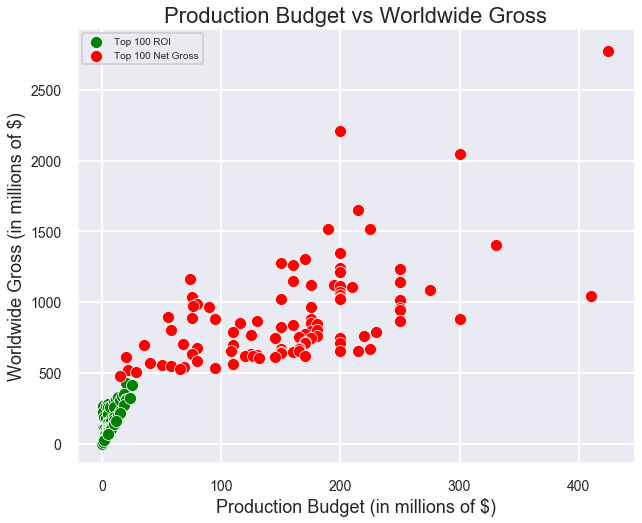

In [68]:
# Comparing the top 100 films by ROI and the top 100 films by Net Gross
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x = 'production_budget' , y= 'worldwide_gross', data=top100_ROI , ax=ax, color = 'green', label = 'Top 100 ROI')
sns.scatterplot(x = 'production_budget' , y= 'worldwide_gross', data=top100_net_gross , ax=ax, color = 'red', label = 'Top 100 Net Gross')

plt.title('Production Budget vs Worldwide Gross', fontsize =22)

plt.xlabel('Production Budget (in millions of $)', fontsize = 18) #modify labels
plt.ylabel('Worldwide Gross (in millions of $)', fontsize = 18)

plt.xticks(fontsize = 14) #modify ticks
plt.yticks(fontsize = 14)

plt.legend(fontsize = 'medium')
plt.show()

Just from the scatter plot above, it looks like the financial characteristics of these 2 different types of "successful" films are very different. Top ROI films have typically very low production budgets (relative to the top Net Gross films), they also gross much less on an <strong>absolute</strong> basis. The next thing we notice is that top Net Gross films have much much higher production budgets and gross much more on a worldwide basis.

<div class="alert alert-block alert-info">
<b>Key takeaways from this section:</b> 
    <ul>
        <li>film making is risky; approximately <b>38%</b> of films for which financial data is available made a loss.</li>
        <li>where films do achieve a profit in ROI terms, the median ROI is <b>304%</b>, median Net Gross is <b>$48m</b>.</li>
    <li> films in the top 100 by ROI are characterised by relatively low production budgets but very high <b>percentage</b> return./li>
    <li> films in the top 100 by Net Gross are characterised by relatively high production budgets and even higher worldwide gross./li>
    </ul>
</div>

## Focus on production budgets

From the above analysis on the different financial characteristics of movies, it might make sense to place the each film of the overall dataset into one of 4 categories (created out of the quartiles of the overall distribution of production budget), depending on its production budget. Its also worth noting that this is how the movie industry differentiates its output; think of the terms "indie" movie or "blockbuster" and how they have come to acquire their respective meanings when we discuss movies. This will help us visualise the composition of production budgets amongst films in the top 100 by ROI and top 100 by Net Gross.

We must first look at the distribution of production budget in the overall dataset. In particular, we should examine the 3 quartiles of the distribution of production budget.

In [69]:
overall_df['production_budget'].describe()

count    2358.000000
mean       36.063003
std        49.593221
min         0.000000
25%         5.000000
50%        18.000000
75%        44.000000
max       425.000000
Name: production_budget, dtype: float64

Using those quartiles, we can create 4 categories of films, depending on their production budget (each a "**budget category**"). These are:

<ol>
    <li>independent movies with less than 5m in production budget</li>
    <li>low budget movies with less than 18m in production budget</li>
    <li>medium budget movies with less than 44m in production budget</li>
    <li>blockbusters with more than 44m in production budget</li>
    </ol>

We should create another column in the overall_df dataframe with categorical information of whether a particular movie was in the **indie**, **low**, **medium** or **blockbuster** budget category.

In [70]:
overall_df['production_budget'].isnull().any() # this just checks there are no null values for production_budget.

False

In [71]:
overall_df['budget_cat'] = overall_df['production_budget'] # create a new column 'budget_cat'
overall_df.loc[overall_df['production_budget'] <= 5, 'budget_cat'] = 'indie' # these label budget_cat with the category discussed above
overall_df.loc[(overall_df['production_budget'] <= 18) & (overall_df['production_budget'] > 5), 'budget_cat'] = 'low'
overall_df.loc[(overall_df['production_budget'] <= 44) & (overall_df['production_budget'] > 18), 'budget_cat'] = 'medium'
overall_df.loc[overall_df['production_budget'] > 44, 'budget_cat'] = 'blockbuster'

In [72]:
overall_df['budget_cat'].value_counts().sum() # this tests we have assigned the categories properly. Adding all the unique labels up we have 2358

2358

Let's compare the distribution of budget categories amongst the Top 100 films by Net Gross with the Top 100 films by ROI.

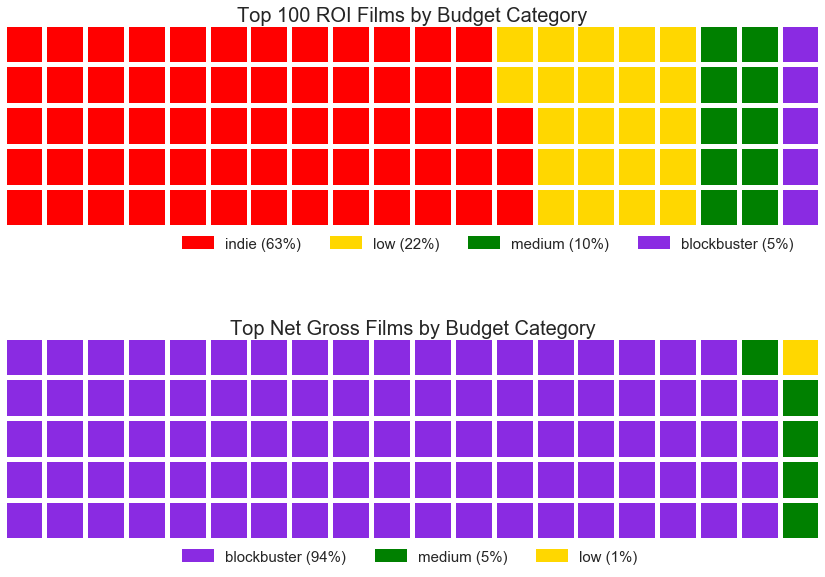

In [73]:


# rerun the ROI profit and top100_ROI dataframes to get a Top 100 ROI dataframe with budget cat
ROI_profit = overall_df[(overall_df['ROI'] > 100)]
top100_ROI = ROI_profit.sort_values(by = 'ROI', ascending = False)[:100] 

ROI_budget_dict = top100_ROI['budget_cat'].value_counts().to_dict() # turn the budget cat into dict for use in the waffle

# rerun net_gross_profit and Top100_net_gross again to include the budget cat column
net_gross_profit = overall_df[overall_df['net_gross'] > 0]
top100_net_gross = net_gross_profit.sort_values(by = 'net_gross', ascending = False)[:100]

# turn the budget cat into dict for use in the waffle
ng_budget_dict = top100_net_gross['budget_cat'].value_counts().to_dict() 

# plot the waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    figsize = (12,12),
    rows = 5,
    plots = {
        '211': {
            'values': ROI_budget_dict,
            'colors': ['red','gold','green','blueviolet'],
            'title' : {'label': 'Top 100 ROI Films by Budget Category',
                       'loc': 'center',
                       'fontdict': {'fontsize': 20}},
            'labels' :["{0} ({1}%)".format(k, v) for k, v in ROI_budget_dict.items()],
            'legend' : {'loc': 'lower left',
                    'bbox_to_anchor': (0.2, -0.2),
                    'ncol': len(ROI_budget_dict),
                    'framealpha': 0,
                     'fontsize': 15}
                    },
         '212': {
            'values':ng_budget_dict,
            'colors' :['blueviolet','green','gold'],
            'title':{'label': 'Top Net Gross Films by Budget Category',
                   'loc': 'center',
                    'fontdict': {'fontsize': 20}
                 },
            'labels':["{0} ({1}%)".format(k, v) for k, v in ng_budget_dict.items()],
            'legend':{'loc': 'lower left',
                    'bbox_to_anchor': (0.2, -0.2),
                    'ncol': len(ng_budget_dict),
                    'framealpha': 0,
                     'fontsize': 15}}
    })
               

As we can see, the visualisation confirms what we already knew from the scatter plot - amongst the top 100 films by Net Gross, none of the films are so-called indie movies. We will return to a visualisation of this type later on in the analysis when we propose what the starting point for deciding what kind of movies Microsoft should make.

<div class="alert alert-block alert-info">
<b>Key takeaway from this section:</b> 
<ul>
    <li>films with high ROI have much lower budgets relative to films with high Net Gross.</li>
    <li>films that have been categorised as indie films dominate the list of top 100 films by ROI.</li>
    <li>films that have been categorised as blockbusters dominate the list of top 100 films by Net Gross.</li>
    <li>the following analysis will rely heavily on this categorisation of films into various budget categories.</li>
    </ul></div>

## How bad can it be? (Or how much money is lost making movies)

What of the films that spent more in production budget than it took in from worldwide gross? We know that around 38% of movies in our dataset lose money, but how bad can things get?

In [74]:
#looking at the ROI of films that made a net gross loss
# the 75th percentile of such films had an ROI of nearly 0.51 which means that for every dollar invested one returns 50 cents.
net_gross_loss['ROI'].describe() 

count    882.000000
mean      27.682324
std       31.181726
min        0.000000
25%        0.012500
50%       14.745000
75%       51.045000
max       99.830000
Name: ROI, dtype: float64

To answer that question, we first filter the dataset of films which made a net loss (ie the dataframe net_gross_loss from above) using the 75th percentile in the output above (ie 0.51). We then take the top 100 of this list. This should strip out the outliers in this dataset and capture the majority of losers, including the worst losers, thus creating a set of movies which represent a worst case scenario of sorts.

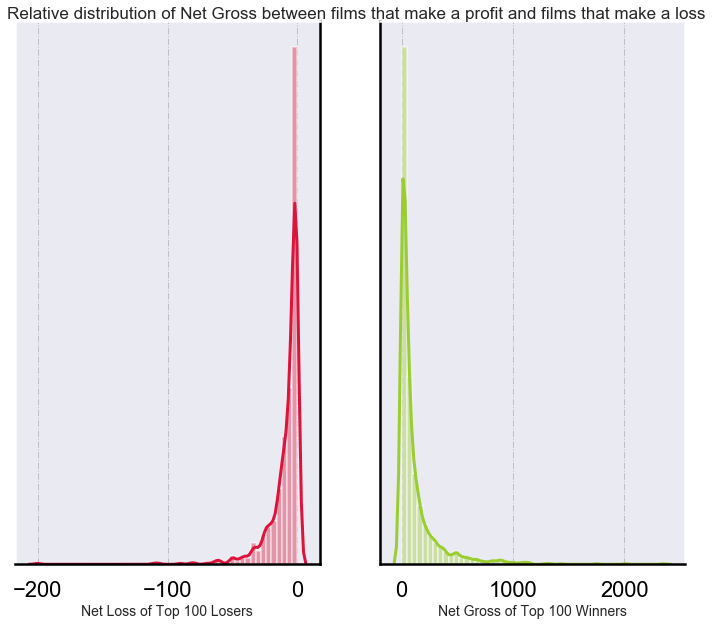

In [75]:
# plot the frequency and magnitude of the losses against the net profits.
#calibrate the figure
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# use a white background and other settings to make the graph look good
plt.rcParams['axes.facecolor'] = 'white'

# spines for ax
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.grid(color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# spines for ax2
ax2.spines['left'].set_color('black')
ax2.spines['bottom'].set_color('black')
ax2.tick_params(axis='x', colors='black')
ax2.grid(color='grey', linestyle='-.', linewidth=1, alpha=0.4)

#plot the subplots
sns.distplot(net_gross_loss["net_gross"],ax=ax, color ='crimson')
sns.distplot(net_gross_profit["net_gross"],ax=ax2, color = 'yellowgreen')

#titles
fig.suptitle('Relative distribution of Net Gross between films that make a profit and films that make a loss', fontsize = 17, x=0.52, y= 0.9)

#ticks
ax.set_yticks([]) # turn off yticks - not necessary, we just want to give an idea of the frequency of net loss/net profit
ax2.set_yticks([]) 

#labels
ax.set_xlabel('Net Loss of Top 100 Losers', fontsize = 14)
ax2.set_xlabel('Net Gross of Top 100 Winners', fontsize = 14)

plt.show()

Observing the **x-axis** of the 2 subplots above, it is encouraging to see that when comparing losses and gains between their respective "Top 100s", net profits are on a **completely different scale** to the net losses when the **magnitude** of the losses are considered. More specifically, nearly the entire distribution of the net loss of the Top 100 losers is under **100m** dollars while nearly the entire distribution of the net profit of the Top 100 winners is under **1000m** dollars. It is worth recalling that this is the case when the worst case scenario (in terms of the top 100 losers being picked) is being considered.

The outsized profits relative to the losses mean that from a financial perspective, the upside of a commercially successful movie outstrips the downside risks of a film which does badly at the box office.  These downside risks are very real when 38% of films in our overall dataset (overall_df) fails to even break even.

<div class="alert alert-block alert-info">
<b>Key takeaways from this section:</b> 
    <ul>
        <li>the upside of a commercially successful movie far outstrips the downside risks of a film which does badly at the box office.</li>
        <li>such downside risks are very real; recall 38% of films in the overall dataset fail to even break even.</li>
    </ul>
        </div>

# Do popular films make money? Which films are popular?

> *'Magic Mirror on the wall, who is the fairest one of all?'* - Queen, Snow White and the Seven Dwarves (1937)

As a new entrant to the movie industry, Microsoft's new studio has a reputation to build, both to attract talent and viewers. In theory it could focus on just financial metrics and make films that make money without being very popular, but that would not be a good long term strategy going forward when it has to compete with other studios for the same talent and viewers.  On that basis, it is worth investigating films that are popular, whether they make money and which principals are associated with those films.

## Why bother making popular films? 

Whatever the strategic merits of making popular films for Microsoft's nascent movie studio, let's try to answer the question using our data to double check whether popular films are commercially successful, both on an ROI and Net Gross basis.

In [76]:
#first let's create 3 categories of films
overall_df['popularity'] = overall_df['averagerating'] # create a new column 'budget_cat'
overall_df.loc[overall_df['averagerating'] <= 5, 'popularity'] = 'poor' # these label budget_cat with the category discussed above
overall_df.loc[(overall_df['averagerating'] <= 7) & (overall_df['averagerating'] > 5), 'popularity'] = 'medium'
overall_df.loc[(overall_df['averagerating'] > 7), 'popularity'] = 'great'

As a first step, let's create 3 categories of film based on their average ratings (much as we did for production budget/budget category). These are:

<ol>
    <li>films with an average rating of under (and including) 5.</li>
    <li>films with an average rating of more than 5 but under (and including) 7.</li>
    <li>films with an average rating of more than 7.</li>
    </ol>

On that basis, we create another column in the overall_df dataframe with categorical information of whether a particular movie was in the **poor**, **medium** or **great** in terms of its popularity.

In the interests of granularity, let's divide up the films in the overall data set by both budget category **and** popularity. For the purposes of the boxplot, we shall look at:
<ol>
    <li>divide up the films in the overall dataset by their budget category</li>
    <li>for each such budget category, we then look at the distribution of ROI for poor, medium and great films (that is to say, by their popularity).</li>
</ol>
It is worth noting that ROI is used as the financial metric for success in this case because, unlike Net Gross, it does not go negative and so is easier to conceptualise and analyse. However, in so doing, we must bear in mind that ROI is a measure of success which is biased in favour of indie and low budget movies.

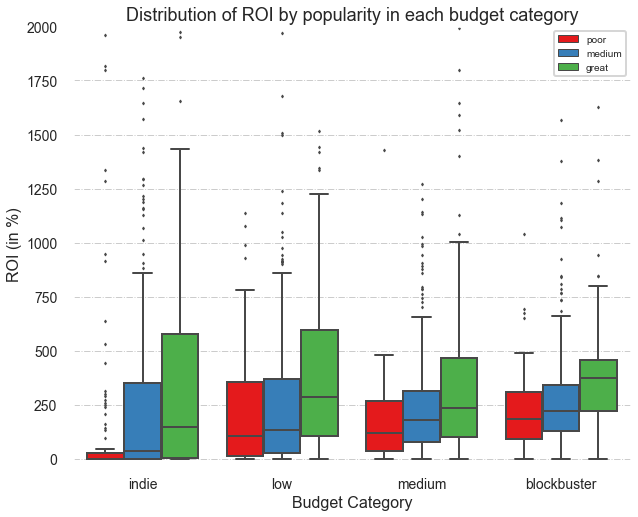

In [77]:
# plot the ROI distribution of each budget category of film and, for each such budget category, 
# by the popularity of films in that category

fig,ax = plt.subplots(figsize=(10,8))  #calibrate the figure
sns.set_style("whitegrid")
ax.grid(color='grey', linestyle='-.', linewidth=1, alpha=0.4)

#plot
ax = sns.boxplot(x="budget_cat", y="ROI", hue="popularity",
                 data=overall_df, 
                 palette="Set1", 
                 order=['indie','low','medium','blockbuster'],
                 hue_order=['poor','medium','great'],
                 saturation = 10,
                 linewidth = 2,
                 fliersize = 2,
                )

ax.set_ylim(-10,2000) # set limits of y axis to actually see the boxplots

ax.set_xlabel('Budget Category', fontsize = 16) #modify labels
ax.set_ylabel('ROI (in %)', fontsize = 16)

plt.yticks(fontsize=14) #modify ticks
plt.xticks(fontsize=14)

plt.legend(loc= 'upper right', fontsize = 'medium') #move the legend out of the way

plt.title('Distribution of ROI by popularity in each budget category', fontsize = 18) #title
plt.show()

From the boxplots above, it is clear that within each budget category, great films have a higher median ROI than films which have only a poor or medium popularity. It is interesting to note that this is true even in the case of blockbusters (which tend to do badly in ROI measures compared to films in other budget categories). Despite the fact that ROI is a measure that is biased against blockbusters, the median ROI for blockbusters which are great films in terms of popularity is higher than the median ROI for films in any other budget category, with any kind of popularity.

<div class="alert alert-block alert-info">
<b>Key takeaways from this section:</b> 
    <ul>
        <li>a popular film is also a commercially successful film, regardless of its production budget.</li>
        <li>this is the case even for blockbusters, which tend to have lower ROI than indie/low budget movies.</li>
    </ul>
        </div>

## What counts as a popular film?

The columns 'numvotes' and 'averagerating' are the metrics of popularity which we have to work with in terms of establishing a test for what counts as a popular film. 

In [78]:
# going back to the overall_df and finding the most popular films.
overall_df.sort_values(by = 'numvotes', ascending = False)

# it looks like some films have NaN values for numvotes and averagerating, let's clean them up.
replace = {'averagerating':0,'numvotes':0}
overall_df.fillna(value=replace, inplace=True)

#did that work? let's check. If the following code returns False, it means all NaN values have been replaced by zeros.
overall_df['numvotes'].isnull().any()

False

In [79]:
# what is the maximum value of numvotes?
max_numvotes=overall_df['numvotes'].max()
min_numvotes=overall_df['numvotes'].min()
print(f'The max value of numvotes is {max_numvotes}. The min value of numvotes is {min_numvotes}.')

The max value of numvotes is 1841066.0. The min value of numvotes is 0.0.


In [80]:
# given the wide range of values for numvotes, any visualisation using numvotes could do with being normalized.
# for the purposes of visualising the relationship between numvotes and averagerating, we could do with using a round number for the rating.

# create a dataframe where there are no zero average ratings or zero numvotes and normalize numvotes in a new column
#this is a df with no zero ratings or zero votes
no_zeros = overall_df[(overall_df['numvotes'] !=0) & (overall_df['averagerating'] !=0)] 

# this rounding creates fewer categories of ratings to work with and plot
no_zeros['round_rating'] = no_zeros['averagerating'].map(lambda x: round(x,0)) 

#normalize the numvotes column - its scale is vastly different for different films
max_value = no_zeros['numvotes'].max()
min_value = no_zeros['numvotes'].min()

no_zeros['norm_votes'] = no_zeros['numvotes'].map(lambda x: (x - min_value)/(max_value - min_value)) #this the column with the numvotes normalized

C:\Users\hsin\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\hsin\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Let's delve deeper into the metrics of popularity by investigating the relationship between ratings and the number of votes by budget category.

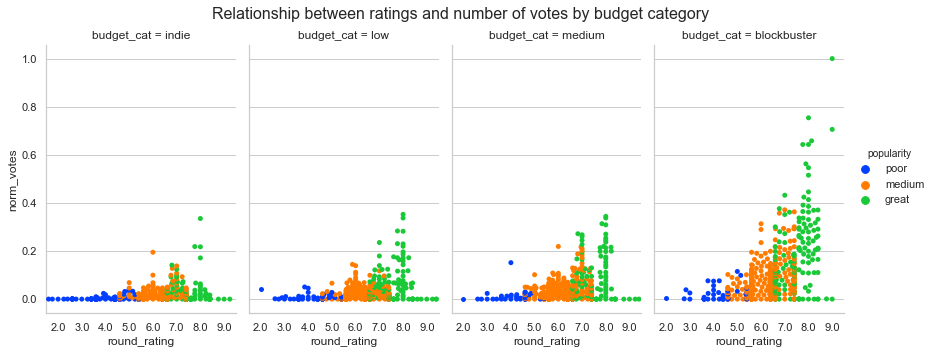

In [81]:
# configure the figure
sns.set(style="whitegrid", palette="bright", color_codes=True)

#plot the graph
g = sns.catplot(x="round_rating", 
                y="norm_votes", 
                hue="popularity",
                hue_order = ['poor','medium','great'],
                col="budget_cat", 
                col_order = ['indie','low','medium','blockbuster'],
                aspect=.6, 
                kind="swarm", 
                data=no_zeros)

#plot the title
plt.subplots_adjust(top = 0.875)
g.fig.suptitle('Relationship between ratings and number of votes by budget category', fontsize = 16)
plt.show()

A few observations on the visualisation above describing the relationship between the number of votes and the rating:
<ul>
    <li>The number of votes per rating in the case of low and medium budget films look very similar.</li>
    <li>Across all budget categories, the <b>grand</b> majority of the datapoints fall under the normalised scale of numvotes at 0.2.</li>
    <li>Given that the max value of numvotes is approximately 1,800,000, 0.2 would imply a level of roughly <b>360,000</b> votes.</li>
    <li>Broadly speaking, films that attract a level of votes <b>above</b> that would mostly have a rating of 7 and above (with a smattering of such 6s).</li>
    <li>High number of votes and high ratings clearly go hand in hand; films with poor popularity (and low ratings) struggle to attract votes.</li>
    <li>Films with high ratings but attracting relatively low number of votes <b>do</b> exist - but those high ratings have to be treated with some suspicion because the low number of votes may have skewed the rating. This means that when we define a dataset of popular films, we must take into account both the number of votes <b>and</b> the averagerating.</li>
    </ul>

It is worth remembering at this stage that we have already implicitly determined what a great movie is; we had previously determined at the beginning of this section that a great (and therefore popular) movie would achieve a rating of 7 or above. But we have also noticed that the number of votes matter if we need to have faith that a high average rating is not skewed by a relatively low number of overly favourable ratings. What then is the distribution of votes received for films with different levels of popularity across different budget categories?

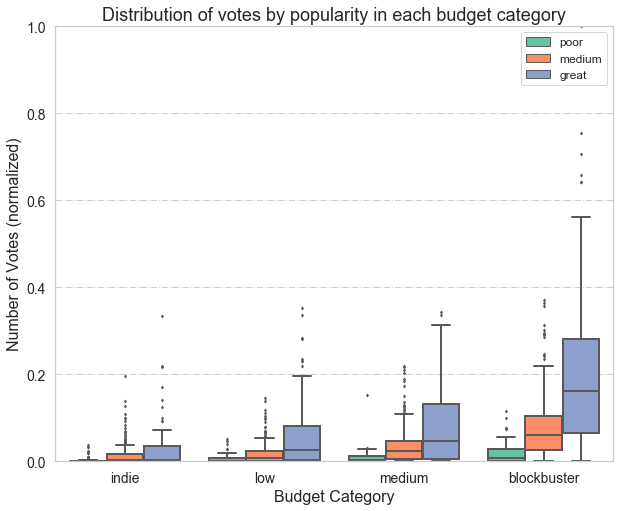

In [82]:
# plot the numvotes distribution of each budget category of film and, for each such budget category, 
# by the popularity of films in that category

fig,ax = plt.subplots(figsize=(10,8))  #calibrate the figure
sns.set_style("whitegrid")
ax.grid(color='grey', linestyle='-.', linewidth=1, alpha=0.4)

#plot
ax = sns.boxplot(x="budget_cat", y="norm_votes", hue="popularity",
                 data=no_zeros, 
                 palette="Set2", 
                 order=['indie','low','medium','blockbuster'],
                 hue_order=['poor','medium','great'],
                 saturation = 10,
                 linewidth = 2,
                 fliersize = 2,
                )

ax.set_ylim(0,1) # set limits of y axis to actually see the boxplots

ax.set_xlabel('Budget Category', fontsize = 16) #modify labels
ax.set_ylabel('Number of Votes (normalized)', fontsize = 16)

plt.yticks(fontsize=14) #modify ticks
plt.xticks(fontsize=14)

plt.legend(loc= 'upper right', fontsize = 'medium') #move the legend out of the way

plt.title('Distribution of votes by popularity in each budget category', fontsize = 18) #title
plt.show()

Looking across again at the normalized scale of the number of votes, the grand majority of films receive a number of votes which would be **below** 0.2 on our normalized scale. Without setting the bar too high (and by exercising a judgement call here) we suggest that any film would have to receive a number of votes which are **above 0.1** on our normalized scale (or **180,000** votes) **in addition to** having a rating of above 7 to be determined as a popular film deserving of further analysis.

In [83]:
popular_df = overall_df[(overall_df['numvotes'] > 180000) & (overall_df['averagerating'] > 7)]
print(f'{len(popular_df)} films have more than 250000 votes for them')

169 films have more than 250000 votes for them


<div class="alert alert-block alert-info">
<b>Key takeaways at this stage:</b>
<ul>
    <li>we have defined a Popular Film as one that not only has an average rating of <b>more than 7</b>, it must also have attracted more than <b>180,000 </b> votes</li>
    <li>this leaves us with a database of <b>169</b> films that we have deemed popular enough to warrant further analysis.</ul></div>

## Popular films that are financially successful

We had determined earlier that there is a relationship between films which are popular and those which are financially successful.

From an ROI perspective, recall that the median ROI of films which have made a profit is 304.29%. From a Net Gross perspective, recall that the median Net Gross of films which have made a profit is 48 million dollars. How many films in our database of popular films make the cut by being above both the median ROI and median Net Gross?

In [84]:
pop_success = popular_df[(popular_df['ROI'] > 304.29) & (popular_df['net_gross'] > 48)] #pop_success df are the popular films that pass our financial benchmarks.
print(f'{len(pop_success)} films have made an ROI of more than 304.29% and Net Gross of more than 48m')

119 films have made an ROI of more than 304.29% and Net Gross of more than 48m


Taking a step back; we started in this section by setting the benchmarks for what constitutes a popular film and applied it to create a dataset of 169 films out of the 2358 films we started off with in overall_df. We then subjected this dataset of 169 films to the benchmarks of financial success (ie whether a film has an ROI of more than 304.29%). 

This has left us with the set of 119 films out of the initial set of 133 popular films. Popular films **can** be financially successful and make money, but not always. In fact, 25% of the initial set of 133 popular films **did not** meet our benchmarks for financial success. However, in the grand majority of cases, popular films will both beat the ROI benchmark and Net Gross benchmark we have set for financial success and can be defined as a successful film.


In [85]:
pop_success.sort_values(by = 'ROI', ascending = False)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,ROI,net_gross,budget_cat,popularity
3517,tt5052448,Get Out,Get Out,2017,104.0,"Horror,Mystery,Thriller",nm1443502,nm1443502,7.7,400474.0,49,2017-02-24,5.0,176.04,255.37,5107.36,250.37,indie,great
3503,tt4975722,Moonlight,Moonlight,2016,111.0,Drama,nm1503575,"nm1503575,nm4144120",7.4,227964.0,64,2016-10-21,1.5,27.85,65.25,4349.70,63.75,indie,great
2839,tt2582846,The Fault in Our Stars,The Fault in Our Stars,2014,126.0,"Drama,Romance",nm1837748,"nm2354099,nm2352210,nm1981261",7.7,315135.0,43,2014-06-06,12.0,124.87,307.17,2559.72,295.17,low,great
170,tt0947798,Black Swan,Black Swan,2010,108.0,"Drama,Thriller",nm0004716,"nm2114730,nm0374560,nm0572352",8.0,648854.0,46,2010-12-03,13.0,106.95,331.27,2548.21,318.27,low,great
623,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",nm0870469,"nm1061091,nm1173295,nm3227090",7.2,260383.0,54,2016-03-11,5.0,72.08,108.29,2165.73,103.29,indie,great
3273,tt3783958,La La Land,La La Land,2016,128.0,"Comedy,Drama,Music",nm3227090,nm3227090,8.0,436070.0,92,2016-12-09,20.0,151.10,426.35,2131.76,406.35,medium,great
918,tt1396484,It,It,2017,135.0,"Horror,Thriller",nm0615592,"nm1286060,nm1560977,nm2477891,nm0000175",7.4,359123.0,24,2017-09-08,35.0,327.48,697.46,1992.74,662.46,medium,great
1653,tt1727824,Bohemian Rhapsody,Bohemian Rhapsody,2018,134.0,"Biography,Drama,Music",nm0001741,"nm0565026,nm0604948",8.0,345466.0,84,2018-11-02,55.0,216.30,894.99,1627.25,839.99,blockbuster,great
1060,tt1457767,The Conjuring,The Conjuring,2013,112.0,"Horror,Mystery,Thriller",nm1490123,"nm0370937,nm0370928",7.5,397233.0,93,2013-07-19,20.0,137.40,318.00,1590.00,298.00,medium,great
2302,tt2084970,The Imitation Game,The Imitation Game,2014,114.0,"Biography,Drama,Thriller",nm0878763,"nm2441699,nm0388132",8.0,620834.0,6,2014-11-28,15.0,91.13,227.74,1518.27,212.74,low,great


# Who is the talent behind these popular films?

> *'I'm gonna make him an offer he can't refuse.'* - Don Vito Corleone, Godfather (1972)

While it would be natural to focus on the talent that one can see on screen (ie the actors), when deciding what **type** of film to make from a commercial perspective it would be better to focus on the head and heart of every movie being produced - the directors and the writers of the production. Directors, in particular, will have a huge influence on how the budget can be deployed to implement the stories written by the writers. Together, they also make casting decisions which will influence which actors will play the characters of any movie. It is therefore imperative to get the choice of directors and writers right as a first step.

## Directors and writers

Let's look at the writers and directors who feature in the database of financially successful popular movies. If Microsoft wants to make commercially successful movies which are critically acclaimed, they should perhaps contact these individuals with the track record of doing so.

In [86]:
director_dict= dict(pop_success['directors'].value_counts().head(5)) # the output shows the top 10 directors in the database of financially successful popular movies
director_dict 

{'nm0634240': 4,
 'nm0751102': 3,
 'nm0001392': 3,
 'nm0751577,nm0751648': 3,
 'nm1490123': 3}

The dictionary above tells us who the top 5 directors are and how many movies they have directed in our set of popular films which are financially successful. In our list of top 5 directors, each of them have produced at least 3 flims in our set of popular films - this shows consistency in the quality and commercial success of output. Let's try to populate this dictionary with actual names.

In [87]:
director_list = list(director_dict.keys()) # we only want the keys from director_dict. Let's turn that into a list director_list
team = director_list[-1].split(',') # let's split out the 2nd item on that list.

# write a loop to append each of the split directors back into a list.
for i in range(len(team)):
    director_list.append(team[i]) # append the already split item (ie the list 'team') back into it on by one.

#extract column names from imdb_name_basics as a list
cols = list(imdb_name_basics.columns)

# use the function to populate the names on directors list, using the same column names as imdb_name_basics
directors = pd.DataFrame(columns = cols)

for d in director_list:
    add_director = person_data(d)
    directors = directors.append(add_director)

directors # this will be a dataframe of these 6 directors (including the 2 Russo brothers), taken from imdb_name_basics.

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
8196,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director","tt0482571,tt1375666,tt5013056,tt0154506"
66164,nm0751102,David O. Russell,1958.0,NaN,"producer,director,writer","tt1045658,tt1800241,tt0120188,tt2446980"
106643,nm0001392,Peter Jackson,1961.0,NaN,"producer,director,writer","tt0167260,tt0092610,tt0120737,tt0360717"
115868,nm1490123,James Wan,1977.0,NaN,"producer,writer,director","tt1457767,tt0387564,tt3065204,tt2820852"
115868,nm1490123,James Wan,1977.0,NaN,"producer,writer,director","tt1457767,tt0387564,tt3065204,tt2820852"


<div class="alert alert-block alert-info">
<b>Key takeaways from this section:</b>
<ul>
    <li>it might be prudent to hire one of Christopher Nolan, David O. Russell, Peter Jackson, James Wan or the Russo brothers to direct a movie given their track record in producing popular yet commercially successful films.</li></div>

What if the top 5 directors are not available to work with. Who else could we identify to work on our films? We will need to identify who the top 20 directors in our set of popular films by Net Gross and ROI. First let's look at a plot of who the directors are for the top 20 films by Net Gross:

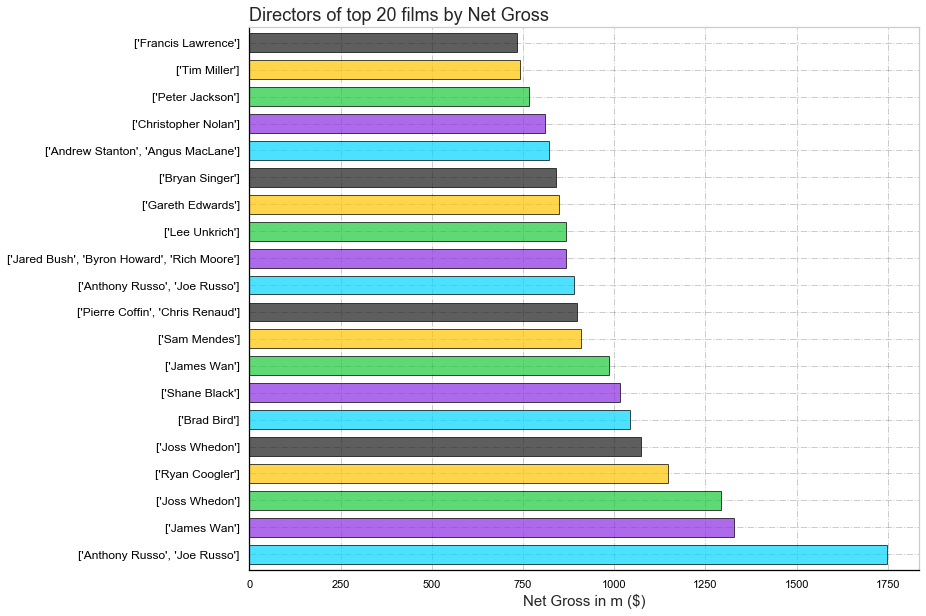

In [88]:
#define figure
fig,ax = plt.subplots()

# use a white background and other settings to make the graph look good
plt.rcParams['axes.facecolor'] = 'white'
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.grid(color='grey', linestyle='-.', linewidth=1, alpha=0.4)


# this is the subset directors that we want to graph
ng = pop_success.sort_values(by = 'net_gross', ascending = False).head(20)

# list of nconst of directors, each is a string
ng_list = list(ng['directors'])
ng_list = [n.split(',') for n in ng_list]

#initialise a list of actual names to use as xticks rather than nconsts
ng_ticks = [] 

# colour list and import package
from itertools import cycle, islice
my_colors_2 = list(islice(cycle(['c', 'm', 'g', 'y', 'k']), None, len(ng)))

#use nested loop to populate director_ticks
#a nested loop is required to account for fact that some directors are listed as more than 1 person
#though this should still work for one person
for i in range(len(ng_list)): 
    placeholder = []
    for j in range(len(ng_list[i])):        
        if len(ng_list[i]) > 1:
            p = name_only(ng_list[i][j])
            placeholder.append(p)           
        else:
            p = name_only(ng_list[i][j])
            placeholder.append(p)
    ng_ticks.append(placeholder)

ng.set_index('directors')['net_gross'].plot(kind='barh', figsize=(12,10), color = my_colors_2, width = .7, alpha = .7, edgecolor = 'black')
ax.set_yticklabels(ng_ticks, fontsize = 12, color = 'black', rotation = 0) # set the xticks with the customised xticks
plt.xlabel('Net Gross in m ($)', fontsize = 15)
plt.ylabel('')
plt.title('Directors of top 20 films by Net Gross', loc = 'left', fontsize = 18)
plt.show()

As we expect, the top 5 directors we had previously identified feature heavily in this chart. For instance, the directorial team of Anthony and Joe Russo feature more than once. Christopher Nolan features only once in the top 20, but his work appears 4 times in the set of popular films. 

Next, we can identify who the directors are for the top 20 films in terms of ROI:

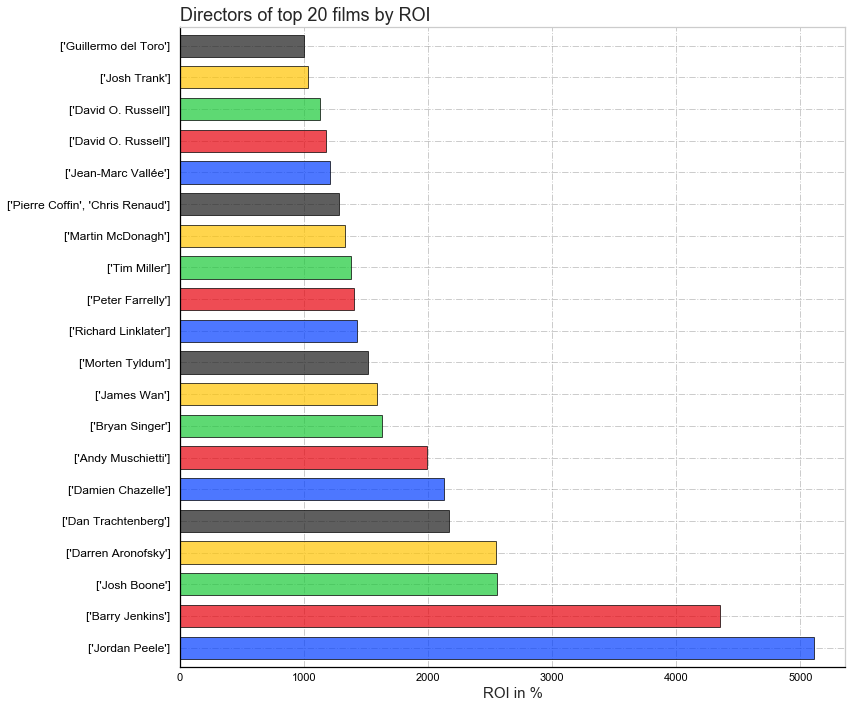

In [89]:
#define the figure
fig,ax = plt.subplots()

# use a white background and other settings to make the graph look good
plt.rcParams['axes.facecolor'] = 'white'
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', colors='black', pad =.2)
ax.grid(color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# this is the subset directors that we want to graph
ROI = pop_success.sort_values(by = 'ROI', ascending = False).head(20)

# list of nconst of directors, each is a string
ROI_list = list(ROI['directors'])
ROI_list = [r.split(',') for r in ROI_list]

#initialise a list of actual names to use as xticks rather than nconsts
ROI_ticks = [] 

# colour list and import package
from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(ROI)))

#use nested loop to populate director_ticks
#a nested loop is required to account for fact that some directors are listed as more than 1 person
#though this should still work for one person
for i in range(len(ROI_list)): 
    placeholder = []
    for j in range(len(ROI_list[i])):        
        if len(ROI_list[i]) > 1:
            p = name_only(ROI_list[i][j])
            placeholder.append(p)           
        else:
            p = name_only(ROI_list[i][j])
            placeholder.append(p)
    ROI_ticks.append(placeholder)

ROI.set_index('directors')['ROI'].plot(kind='barh', figsize=(12,10), color = my_colors, width = .7, alpha = 0.7, edgecolor = 'black', ax=ax)

# format the ticks
ax.set_yticklabels(ROI_ticks, fontsize = 12, color = 'black', rotation =0) # set the xticks with the customised xticks
    
# labelling around the graph
plt.xlabel('ROI in %', fontsize = 15)
plt.ylabel('')
plt.title('Directors of top 20 films by ROI', loc='left', fontsize = 18)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Key takeaways at this stage:</b>
<ul>
    <li>to achieve a high Net Gross, it would be prudent to approach James Wan, Peter Jackson or the Russo brothers to direct because they appear in the list of directors who have work featured in the top 20 films by Net Gross more than once.</li>
    <li>to achieve a high ROI, it would be prudent to approach David O. Russell, who features twice in the top 20 films by ROI.</li>
    <li>it is interesting to note that James Wan has worked on films that features in both the list of top 20 films by Net Gross <b>and</b> the top 20 films by ROI.
    <li>Jordan Peele is also a director worth looking into if the intention is to achieve a high ROI; his ROI of 5000% is very eye-catching and far outstrips the next nearest director by ROI.</div>

In [90]:
#write a function to find the title of a film by its tconst using the IMDB api
def title(tconst):#insert primary title in quotation marks
    num = tconst.strip('tt')
    result = ia.get_movie(num)
    return result['original title']

# write a function to retreive a name where nconst is the argument
# this can be used to find out the name of any director and/or writer and populates the known_for_titles column with actual film names

def who_is(nconst): #argument must be in quote marks when using this function
    name = imdb_name_basics.loc[imdb_name_basics['nconst'] == nconst] # this returns a row with the matching nconst as a stand-alone dataframe of one row
    x_list = name.iloc[0,5].split(',') # this takes data in the known_for_title column in the df and split it up
    known_list = [ ] # initialise an empty list
    for i in x_list: #loop each tconst number split out in the x_list above
        known_list.append(title(i)) # iterate through each member of x_list, using the title function already written.
    known_str = str(known_list) # once the names have been compiled turn them to strings or it won't go into the dataframe.
    # delete the old column with tconst numbers
    name.iloc[0,5] = known_str.lstrip('[').rstrip(']') # reintroduce the old column with the SAME NAME but this time with the lists converted into strings
    return name #return the dataframe. Now one ought to see proper names of movies rather than tconst numbers.

In [91]:
# this is odd, one of James Wan's films is in imdb_title_basics, the other isn't 
# imdb_title_basics is therefore is not a comprehensive list of all the tconsts used!
# there are a lot of missing blanks.
print(imdb_title_basics['tconst'].isin(['tt0387564']).any(),imdb_title_basics['tconst'].isin(['tt1457767']).any())

False True


These are the directors of the top 5 films from our set of films which are both popular and financially successful. There are 6 directors in total - the Russo brothers are listed together as team who worked together on those films. 

What about writers?

In [92]:
writer_dict= dict(pop_success['writers'].value_counts().head(5))
writer_dict

{'nm0909638,nm0101991,nm0001392,nm0868219,nm0866058': 3,
 'nm0634240': 2,
 'nm0604555,nm0860155': 2,
 'nm0666791,nm0202425': 1,
 'nm0770938,nm0460795': 1}

In [93]:
writer_dict= dict(pop_success['writers'].value_counts().head(5)) # the output shows the top 10 directors in the database of financially successful popular movies

# we can repeat the same process above for writers in our pop_success dataframe.
writers= list(writer_dict.keys()) # we only want the keys from director_dict. Let's turn that into a list director_list
writer_list= [ ]

# the write team list will be 
for w in range(len(writers)):
    writer = writers[w].split(',') #.
    writer_list.append(writer)

# use the function to populate the names on directors list, using the same column names as imdb_name_basics
writers = pd.DataFrame(columns = cols)

for i in range(len(writer_list)):
    for j in writer_list[i]:
        name = person_data(j)
        writers = writers.append(name)
writers

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
73675,nm0909638,Fran Walsh,1959.0,NaN,"writer,casting_department,producer","tt0167260,tt0120737,tt0167261,tt0360717"
54264,nm0101991,Philippa Boyens,NaN,NaN,"writer,producer,soundtrack","tt0167261,tt0360717,tt0167260,tt0120737"
106643,nm0001392,Peter Jackson,1961.0,NaN,"producer,director,writer","tt0167260,tt0092610,tt0120737,tt0360717"
60782,nm0868219,Guillermo del Toro,1964.0,NaN,"writer,producer,director","tt0167190,tt0457430,tt5580390,tt1663662"
73590,nm0866058,J.R.R. Tolkien,1892.0,1973.0,"writer,soundtrack","tt0120737,tt0167261,tt0167260,tt0903624"
8196,nm0634240,Christopher Nolan,1970.0,NaN,"writer,producer,director","tt0482571,tt1375666,tt5013056,tt0154506"
141748,nm0604555,Chris Morgan,NaN,NaN,"writer,producer,miscellaneous","tt1905041,tt2820852,tt1596343,tt4630562"
30630,nm0860155,Gary Scott Thompson,1959.0,NaN,"writer,producer,director","tt0232500,tt0411061,tt1596343,tt0164052"
112866,nm0666791,Cinco Paul,1964.0,NaN,"writer,producer,actor","tt0258470,tt1482459,tt0451079,tt1323594"
67364,nm0202425,Ken Daurio,NaN,NaN,"writer,director,producer","tt1323594,tt0258470,tt0451079,tt1482459"


Unlike the top directors, who work alone, the top writers seem to work in teams instead.  Guillermo del Toro appears in more than one such team.  It's interesting to note that Christopher Nolan appears both in our dataframe of top directors and top writers. JRR Tolkien won't be a writer whom Microsoft can resurrect for future films though.

<div class="alert alert-block alert-info">
<b>Key takeaways at this stage:</b>
<ul>
    <li>Unlike the top directors, who work alone, the top writers seem to work in teams instead.</li>
    <li><b>Guillermo del Toro</b> appears in more than one such team.</li>
    <li>t's interesting to note that <b>Christopher Nolan</b> appears both in our dataframe of top directors and top writers.</li>
    </ul></div>

## Who are the actors in the top films?

It was suggested that directors and writers are at the heart of any production and it will be seen from the remaining analysis that the focus remains very much on the directors and writers. But let's take a sideways glance at who the actors are in the top films.

To answer this question, we should use the dataset in imdb_title_principals, which shows all the principal actors by the tconst of a particular film.

In [94]:
# write a function that will return a smaller dataset of individuals who have worked on a movie with a specific tconst.
def principals(tconst):
    principals_df = imdb_title_principals.loc[imdb_title_principals['tconst'] == tconst]
    return principals_df

#write a function cast_is that will replace the nconst numbers in the output of the function principals into something readable.
def cast_is(tconst):
    data = principals(tconst)
    data.reset_index(drop=True, inplace=True)
    for i in range(len(data)):
        id_num = data.at[i,'nconst']
        ind_val = int(person_data(id_num).index.values) # this gets the index of the name created by person_data, this is not going to be 0
        proper_name = person_data(id_num).at[ind_val, 'primary_name'] # this gets the name
        data.replace(data.at[i,'nconst'],proper_name, inplace=True) # this replaces the nconst with the person's name
        primary_title = title(tconst)
        data.replace(tconst, primary_title, inplace=True) #this replaces the tconst with the film's name, otherwise we wouldn't know which film
    data.rename({'tconst':'movie','nconst':'person'}, axis = 'columns', inplace=True)
    return data

Let's use the function above and use it on the 4th most popular film in our dataframe pop_success.

In [95]:
pop_success.head(10) # the sixth most popular in the list is Drive

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,ROI,net_gross,budget_cat,popularity
25,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218.0,47,2010-06-18,200.0,415.00,1068.88,534.44,868.88,blockbuster,great
27,tt0443272,Lincoln,Lincoln,2012,150.0,"Biography,Drama,History",nm0000229,"nm1065785,nm0329447",7.4,228701.0,73,2012-11-09,65.0,182.21,273.35,420.53,208.35,blockbuster,great
34,tt0451279,Wonder Woman,Wonder Woman,2017,141.0,"Action,Adventure,Fantasy",nm0420941,"nm0374302,nm0811583,nm0297229,nm0551376,nm4243936",7.5,487527.0,55,2017-06-02,150.0,412.56,821.13,547.42,671.13,blockbuster,great
38,tt0454876,Life of Pi,Life of Pi,2012,127.0,"Adventure,Drama,Fantasy",nm0000487,"nm1674631,nm1341735",7.9,535836.0,88,2012-11-21,120.0,124.99,620.91,517.43,500.91,blockbuster,great
40,tt0455944,The Equalizer,The Equalizer,2014,132.0,"Action,Crime,Thriller",nm0298807,"nm0921013,nm0805994,nm2030456",7.2,302302.0,96,2014-09-26,55.0,101.53,192.90,350.73,137.90,blockbuster,great
60,tt0478970,Ant-Man,Ant-Man,2015,117.0,"Action,Adventure,Comedy",nm0715636,"nm0942367,nm0180428,nm0570912,nm0748620,nm0498278,nm1293367,nm0456158",7.3,501213.0,43,2015-07-17,130.0,180.20,518.86,399.12,388.86,blockbuster,great
90,tt0780504,Drive,Drive,2011,100.0,"Crime,Drama",nm0716347,"nm0024925,nm2201245",7.8,521495.0,36,2011-09-16,15.0,35.06,81.36,542.39,66.36,low,great
98,tt0790636,Dallas Buyers Club,Dallas Buyers Club,2013,117.0,"Biography,Drama",nm0885249,"nm1258965,nm2214893",8.0,402462.0,73,2013-11-01,5.0,27.30,60.61,1212.24,55.61,indie,great
126,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",nm0634240,"nm0634300,nm0634240",8.6,1299334.0,32,2014-11-05,165.0,188.02,666.38,403.87,501.38,blockbuster,great
135,tt0837562,Hotel Transylvania,Hotel Transylvania,2012,91.0,"Animation,Comedy,Family",nm0850733,"nm0063165,nm0806912,nm0244110,nm1087952,nm1156984",7.1,204571.0,96,2012-09-28,85.0,148.31,378.51,445.30,293.51,blockbuster,great


In [96]:
cast_is('tt0780504') # plug in the tconst of Drive into the cast_is function we've just written (tt0780504)

C:\Users\hsin\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\hsin\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,movie,ordering,person,category,job,characters
0,Drive (2011),10,Marc Platt,producer,producer,NaN
1,Drive (2011),1,Ryan Gosling,actor,NaN,"[""Driver""]"
2,Drive (2011),2,Carey Mulligan,actress,NaN,"[""Irene""]"
3,Drive (2011),3,Bryan Cranston,actor,NaN,"[""Shannon""]"
4,Drive (2011),4,Albert Brooks,actor,NaN,"[""Bernie Rose""]"
5,Drive (2011),5,Nicolas Winding Refn,director,NaN,NaN
6,Drive (2011),6,Hossein Amini,writer,screenplay,NaN
7,Drive (2011),7,James Sallis,writer,book,NaN
8,Drive (2011),8,Michel Litvak,producer,producer,NaN
9,Drive (2011),9,John Palermo,producer,producer,NaN


As a bonus, the cast_is function will return not only return the actors associated with a film, it will also return the name of its directors, writers and producers.  We can use this to find out the exact names of the creative team behind each film should we wish to know who the creative force is behind any particular movie.

# Analysing Popular Films by genre

>*'My mom says life is like a box of chocolates, you never know what you're gonna get.'* - Forrest Gump, Forrest Gump (1994)

Answering the question of which films to make will involve finding out the right *genre* of film to make. In this section, we analyse our set of popular films against our benchmarks for financial success (ie Net Gross and ROI) to see what genre of films might be the focus for Microsoft's new studio.

## Which genre of film makes the most money in terms of Net Gross?

In [97]:
# sum up the net gross by genre in the dataframe of popular films.
# this goes into a dictionary
genres_dict = pop_success.groupby(['genres'])['net_gross'].sum().sort_values(ascending = False).to_dict()

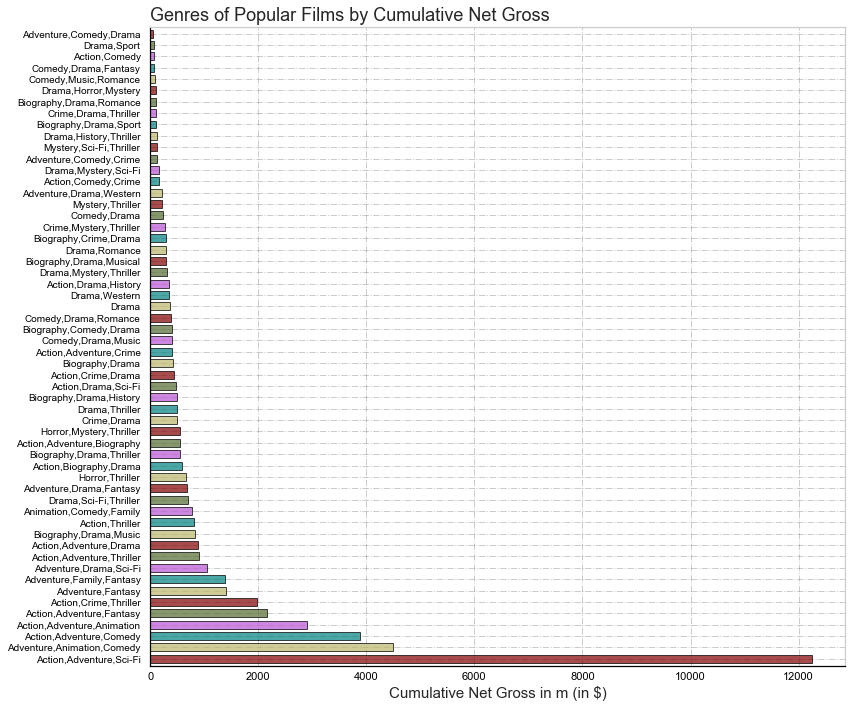

In [98]:
#define the figure
fig,ax = plt.subplots()

# use a white background and other settings to make the graph look good
plt.rcParams['axes.facecolor'] = 'white'
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', colors='black', pad =.2)
ax.grid(color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# using the genres dict, create a list of genres that can be used as yticks.
genres_list = list(genres_dict.keys())

# colour list and import package
from itertools import cycle, islice
my_colors = list(islice(cycle(['maroon', 'darkkhaki', 'teal', 'mediumorchid', 'darkolivegreen']), None, len(pop_success)))

# plot the total net gross by genre. This follows the same code used to generate genres_dict
pop_success.groupby(['genres'])['net_gross'].sum().sort_values(ascending = False).plot(kind='barh', figsize=(12,10), color = my_colors, width = .7, alpha = 0.7, edgecolor = 'black', ax=ax)

# format the yticks
ax.set_yticklabels(genres_list, fontsize = 10, color = 'black', rotation = 0) # set the xticks with the customised xticks
    
# labelling around the graph
plt.xlabel('Cumulative Net Gross in m (in $)', fontsize = 15)
plt.ylabel('')
plt.title('Genres of Popular Films by Cumulative Net Gross', fontsize = 18, loc = 'left')
plt.tight_layout()
plt.show()

From our set of Popular Films, films in the "Action,Adventure,Sci-Fi" genre have the highest cumulative Net Gross by some distance. In our set of Popular Films, they have grossed (in total) $12.5 billion. Microsoft definitely need to make a few films from this genre.

Who are the directors and writers in this genre?

## Who is the talent behind "Action,Adventure,Sci-Fi" films?

In [99]:
# make a list of the directors who participate in the genre.
action_direct = list(pop_success[pop_success.genres == 'Action,Adventure,Sci-Fi']['directors'].value_counts().keys())

action_direct = [r.split(',') for r in action_direct] #first element on the list is a team, the Russo brothers probably

#initialise empty list of names so we can read names instead of nconsts.
action_direct_name = [ ]

#this was used above when generating graphs of directors of the Top 20 films by ROI and by Net Gross
for i in range(len(action_direct)): 
    placeholder = []
    for j in range(len(action_direct[i])):        
        if len(action_direct[i]) > 1:
            p = name_only(action_direct[i][j])
            placeholder.append(p)           
        else:
            p = name_only(action_direct[i][j])
            placeholder.append(p)
    action_direct_name.append(placeholder)
    
print(*action_direct_name, sep='\n')

['Anthony Russo', 'Joe Russo']
['Joss Whedon']
['Christopher Nolan']
['Bryan Singer']
['Steven Spielberg']
['Gary Ross']
['Francis Lawrence']
['Jon Watts']
['Ryan Coogler']
['Gareth Edwards']
['Shane Black']


Some of the directors in this list would be familiar from our look into the talent behind Popular Films. The Russo brothers and Christopher Nolan stand out.

In [100]:
# make a list of the writers who participate in the genre.
action_writers = list(pop_success[pop_success.genres == 'Action,Adventure,Sci-Fi']['writers'].value_counts().keys())

action_writers = [r.split(',') for r in action_writers] #splitting the team of writers up.

#initialise empty list of names so we can read names instead of nconsts.
action_writers_name = [ ]

#this was used above when generating graphs of directors of the Top 20 films by ROI and by Net Gross
for i in range(len(action_writers)): 
    placeholder = []
    for j in range(len(action_writers[i])):        
        if len(action_writers[i]) > 1:
            p = name_only(action_writers[i][j])
            placeholder.append(p)           
        else:
            p = name_only(action_writers[i][j])
            placeholder.append(p)
    action_writers_name.append(placeholder)
    
print(*action_writers_name, sep='\n')

['Christopher Nolan']
['Ryan Coogler', 'Joe Robert Cole', 'Stan Lee', 'Jack Kirby']
['Christopher Markus', 'Stephen McFeely', 'Joe Simon', 'Jack Kirby', 'Mark Millar', 'Steven McNiven']
['Simon Beaufoy', 'Michael Arndt', 'Suzanne Collins']
['Drew Pearce', 'Shane Black', 'Stan Lee', 'Don Heck', 'Larry Lieber', 'Jack Kirby', 'Warren Ellis', 'Adi Granov']
['Christopher Markus', 'Stephen McFeely', 'Stan Lee', 'Jack Kirby', 'Joe Simon', 'Steve Englehart', 'Steve Gan', 'Bill Mantlo', 'Keith Giffen', 'Jim Starlin', 'Larry Lieber', 'Don Heck']
['Joss Whedon', 'Stan Lee', 'Jack Kirby', 'Joe Simon', 'Jim Starlin']
['Zak Penn', 'Ernest Cline']
['Chris Weitz', 'Tony Gilroy', 'John Knoll', 'Gary Whitta', 'George Lucas']
['Jonathan Goldstein', 'John Francis Daley', 'Jon Watts', 'Christopher Ford', 'Chris McKenna', 'Erik Sommers', 'Stan Lee', 'Steve Ditko', 'Joe Simon', 'Jack Kirby']
['Simon Kinberg', 'Jane Goldman', 'Matthew Vaughn', 'Jack Kirby', 'Stan Lee']
['Joss Whedon', 'Zak Penn']
['Gary Ross'

As observed before, writers tend to work more in teams than directors do. The above are the writing teams that have worked on these Action,Adventure,Sci-Fi films.  One name stands out again - **Christoper Nolan**.

## Which genre has the highest ROI and who is the talent behind them?

We can re-run the same analysis above on the same dataset of Popular Films, this time changing only the metric for financial success from Net Gross to ROI. Which genre of films are commercially successful by this measure?

In [101]:
# find the median ROI by genre in the dataframe of popular films.
# this goes into a dictionary
genres_ROI = pop_success.groupby(['genres'])['ROI'].median().sort_values(ascending = False).to_dict()

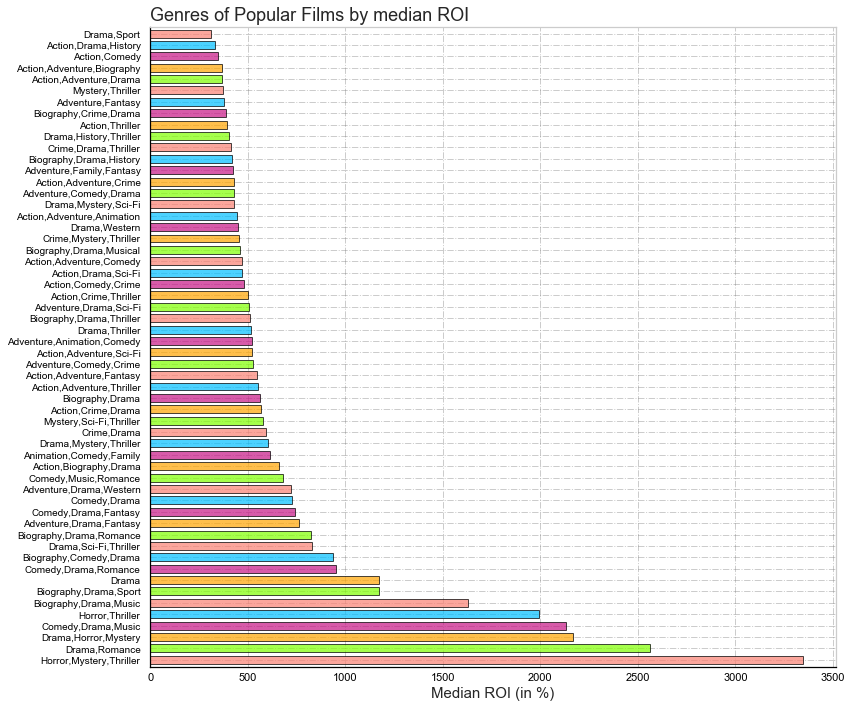

In [107]:
#define the figure
fig,ax = plt.subplots()

# use a white background and other settings to make the graph look good
plt.rcParams['axes.facecolor'] = 'white'
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', colors='black', pad =.2)
ax.grid(color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# using the genres dict, create a list of genres that can be used as yticks.
genres_ROI_list = list(genres_ROI.keys())

# colour list and import package
from itertools import cycle, islice
my_colors = list(islice(cycle(['salmon', 'chartreuse', 'orange', 'mediumvioletred', 'deepskyblue']), None, len(pop_success)))

# plot the median ROI by genre. This follows the same code used to generate genres_ROI
pop_success.groupby(['genres'])['ROI'].median().sort_values(ascending = False).plot(kind='barh', figsize=(12,10), color = my_colors, width = .7, alpha = 0.7, edgecolor = 'black', ax=ax)

# format the yticks
ax.set_yticklabels(genres_ROI_list, fontsize = 10, color = 'black', rotation = 0) # set the xticks with the customised xticks
    
# labelling around the graph
plt.xlabel('Median ROI (in %)', fontsize = 15)
plt.ylabel('')
plt.title('Genres of Popular Films by median ROI', fontsize = 18, loc ='left')
plt.tight_layout()
plt.show()

On the basis of median ROI, films falling into the genre of "Horror,Mystery,Thriller" have the highest median ROI somewhere in the region of 3400%. "Drama,Romance" films is in second place with a very respectable median ROI of more than 2500%.

To put this into context, a film with an ROI of 3400% makes **34** times its production budget. While those returns sound spectacular - it is worth recalling that films with ROI are overwhelmingly likely to be low budget or indie efforts. 34 times a small amount is therefore unlikely to produce a net gross which will rival Action,Adventure,Sci-Fi movies.  

However, as suggested before, there is financial a case to be made for including such low budget,high ROI films in a studio's output. The question is, what mix of films to produce?

Before we turn to that question, let's see who the directors and writers are for "Horror,Mystery,Thriller" films.

In [103]:
# make a list of the directors who participate in the genre.
horror_direct = list(pop_success[pop_success.genres == 'Horror,Mystery,Thriller']['directors'].value_counts().keys())

horror_direct = [r.split(',') for r in horror_direct] #first element on the list is a team, the Russo brothers probably

#initialise empty list of names so we can read names instead of nconsts.
horror_direct_name = [ ]

#this was used above when generating graphs of directors of the Top 20 films by ROI and by Net Gross
for i in range(len(horror_direct)): 
    placeholder = []
    for j in range(len(horror_direct[i])):        
        if len(horror_direct[i]) > 1:
            p = name_only(horror_direct[i][j])
            placeholder.append(p)           
        else:
            p = name_only(horror_direct[i][j])
            placeholder.append(p)
    horror_direct_name.append(placeholder)
    
print(*horror_direct_name, sep='\n')

['James Wan']
['Jordan Peele']


It comes as some surprise that there are only 2 directors who dominate this genre amongst the set of Popular Films. It doesn't come as a surprise that those directors are **Jordan Peele** and **James Wan**, both of whom have appeared in our previous analysis of the directors involved in films which are in the top 20 for ROI achieved. Let's double check the result.

In [104]:
pop_success[pop_success.genres == 'Horror,Mystery,Thriller'] # double check the above.

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,ROI,net_gross,budget_cat,popularity
1060,tt1457767,The Conjuring,The Conjuring,2013,112.0,"Horror,Mystery,Thriller",nm1490123,"nm0370937,nm0370928",7.5,397233.0,93,2013-07-19,20.0,137.40,318.00,1590.00,298.00,medium,great
3517,tt5052448,Get Out,Get Out,2017,104.0,"Horror,Mystery,Thriller",nm1443502,nm1443502,7.7,400474.0,49,2017-02-24,5.0,176.04,255.37,5107.36,250.37,indie,great


It looks like the ROI success of Horror,Mystery,Thriller films is down principally to Jordan Peele's **Get Out**. Based on this very narrowly based result, Microsoft might want to do a deeper dive into the talent for the second most popular genre of film (when measured on an ROI basis) - these are the "Drama, Romance" films.

Let's also look at who the writers are for these 2 Horror,Mystery,Thriller films to complete the picture at this stage.

In [105]:
# make a list of the writers who participate in the genre.
horror_writers = list(pop_success[pop_success.genres == 'Horror,Mystery,Thriller']['writers'].value_counts().keys())

horror_writers = [r.split(',') for r in horror_writers] #splitting the team of writers up.

#initialise empty list of names so we can read names instead of nconsts.
horror_writers_name = [ ]

#this was used above when generating graphs of directors of the Top 20 films by ROI and by Net Gross
for i in range(len(horror_writers)): 
    placeholder = []
    for j in range(len(horror_writers[i])):        
        if len(horror_writers[i]) > 1:
            p = name_only(horror_writers[i][j])
            placeholder.append(p)           
        else:
            p = name_only(horror_writers[i][j])
            placeholder.append(p)
    horror_writers_name.append(placeholder)
    
print(*horror_writers_name, sep='\n')

['Chad Hayes', 'Carey W. Hayes']
['Jordan Peele']


<div class="alert alert-block alert-info">
<b>Key takeaways from this section:</b> 
<ul>
    <li>films in the <b>"Action,Adventure,Sci-Fi"</b> genre are kings of films with the top Net Gross. They have <b>cumulatively</b> grossed nearly <b>$12.5b</b>.</li>
    <li>the <b>Russo</b> brothers and <b>Christopher Nolan</b> feature prominently in the production of films in the "Action,Adventure,Sci-Fi" genre.</li>
    <li>films in the <b>"Horror,Mystery,Thriller"</b> genre lead amongst the films with the top median ROI. They have achieved a median ROI of approximately <b>3400 per cent.</b></li>
    <li><b>Jordan Peele and James Wan</b> feature prominently in the production of films in the "Horror,Mystery,Thriller" genre</li>
    <li>However, the success of "Horror,Mystery,Thriller" as a genre is not broad based, it is based on only 2 films. Therefore it is also worth considering, from an ROI perspective, films in the <b>"Drama,Romance"</b> genre as well.</li>
</ul></div>

# The right mix of films to make

>*'Show me the money!'* - Jerry Maguire, Jerry Maguire (1996)

Earlier on in our analysis we had promised to revisit the question of mix of films Microsoft should be looking to make; should they be concentrating only on blockbusters at the expense of indie movies? Or should they eschew blockbusters in favour of indie movies?

Perhaps the prudent course of action is to make <strong>both</strong> types of films; films that make a large net return (ie films in the Top100_net_gross dataset) <strong>and</strong> make a large percentage return  (ie films in the Top100_ROI dataset). This kind of approach helps to **diversify away** the high risk of loss in the busines of film making. Concentrating **only** on blockbusters would magnify the financial risk, concentrating **only** on indie movies would look good from an ROI measure, but may return too little in absolute terms.

The exact composition of that mix is subject largely to Microsoft's expected return from their movie studio. If they expect very high percentage returns, they should concentrate on making films that have the financial profile of the films in the Top100_ROI dataset. Conversely, if they expect very high net revenues (even if the ROI is not great in percentage terms) they should make films in the Top100_net_gross dataset. We will need to know what the expected return is and have other metrics about the films to draw further conclusions on this question. 

However, let's provide a starting point for this decision by assuming that Microsoft wanted to make 100 films to begin with. We can use our dataset of 119 popular films from which 100 films are sampled and look at the budget category of that sample.

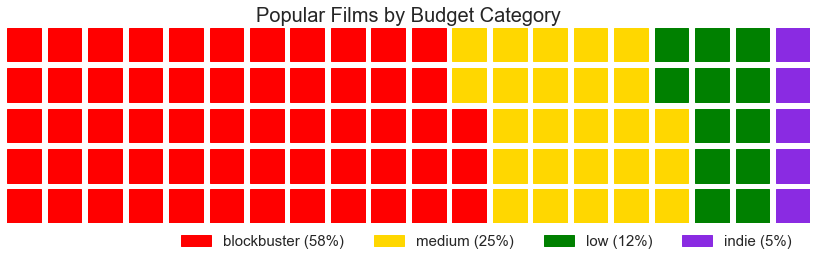

In [106]:
#plot waffle chart of the composition of popular films

pop_dict = pop_success['budget_cat'].sample(100).value_counts().to_dict() # take a sample of 100 films from 119 popular films.

# plot the waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    figsize = (12,12),
    rows = 5,
    values = pop_dict,
    colors = ['red','gold','green','blueviolet'],
    title = {'label': 'Popular Films by Budget Category',
                       'loc': 'center',
                       'fontdict': {'fontsize': 20}},
    labels = ["{0} ({1}%)".format(k, v) for k, v in pop_dict.items()],
    legend = {'loc': 'lower left',
                    'bbox_to_anchor': (0.2, -0.2),
                    'ncol': len(pop_dict),
                    'framealpha': 0,
                     'fontsize': 15})

<div class="alert alert-block alert-info">
<b>Key takeaways from this section:</b> 
<ul>
    <li>the output of the new studio should focus on making 57 per cent. blockbusters, 24 per cent. medium budget films, 15 per cent. low budget films and 4 per cent. indie movies.</li>
    <li>however, this is subject to Microsoft's financial objectives, its cost of funding and expected return.</li>
</ul></div>

# Summary

> *'Hasta la vista, baby'* - The Terminator, Terminator 2: Judgment Day (1991)

<div class="alert alert-block alert-success">
<b>In summary:</b>
    <ol>
        <li>there are 2 measures by which a movie can be commercially successful; it can be judged by its <b>Net Gross</b> or its <b>ROI</b>.</li>
        <li>its worth stating the obvious; a popular film is also a commercially successful film, regardless of its production budget.</li>
        <li> the median Net Gross of profit making films is <b>$48m</b>, the median ROI of profit making films is <b>304.29.</b></li>
        <li>filmmaking is a risky business - nearly <b>38 per cent.</b> of films did not recover their production budget.</li>
        <li> despite that risk, the rewards are considerable - the upside of a commercially successful movie far outstrips the downside risks of a film which does badly at the box office.</li>
        <li> films in the top 100 by ROI are characterised by relatively low production budgets but very high <b>percentage</b> return.</li>
        <li>films in the top 100 by Net Gross are characterised by relatively high production budgets and even higher worldwide gross.</li>
        <li>films in the "Action,Adventure,Sci-Fi" genre are kings of films with the top Net Gross. They have <b>cumulatively</b> grossed nearly <b>12.5b dollars</b>. </li>
        <li>films in the "Horror,Mystery,Thriller" genre lead amongst the films with the top median ROI. They have achieved a median ROI of approximately <b>3400 per cent.</b> although films from the "Drama,Romance" category are worth considering.</li>
        <li>the new studio should target making 57 per cent. blockbusters, 24 per cent. medium budget films, 15 per cent. low budget films and 4 per cent. indie movies.</li>
     </ol>
</div>